# ID: A1821

Date of Submission: 17/03/2019

# PREDICTION ON HOUSE PRICE USING DNN ON TENSORFLOW MODEL

Here in this problem the main objective is to predict the house price when some parameters affecting the price is given. As here the exact house price has to be predicted, so it is a regression problem. So solve the problem first it is necessary to understand the individual features and how they contribute to the saleprice. After data visualization data cleansing, hadling missing data and deleting outliers etc these preprocessing have to be performed accordingly. After that a model has to be chosen for regression. Hyper parameter tuning is a must for better results. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import (skew, kurtosis)
from scipy.special import boxcox1p
from sklearn import preprocessing as prep
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print ("Total rows and columns in train dataset: " + str(df_train.shape))
print ("Total rows and columns in test dataset: " + str(df_test.shape))
print(df_train.columns)
print(df_test.columns)


Total rows and columns in train dataset: (1460, 81)
Total rows and columns in test dataset: (1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'G

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In this Train dataset there are 3 float64, 35 int64 and 43 object type datas are present. There are missing values also, proper step should be taken care of.

# ANALYSING SALEPRICE

In [4]:
print('Skewness: %f' % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurtosis())

Skewness: 1.882876
Kurtosis: 6.536282


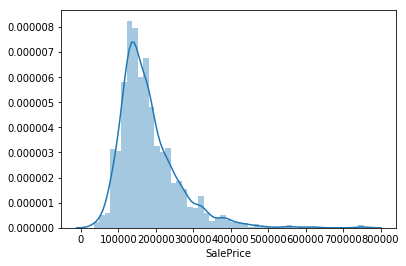

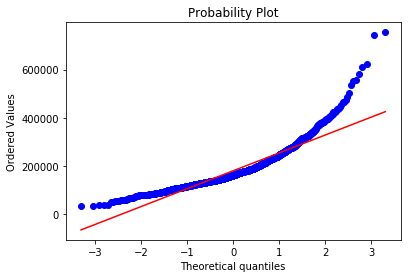

In [5]:
sns.distplot(df_train['SalePrice'])
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Target Feature Saleprice is showing much skewness and kurtosis. In the DNN model during RMSE calculation Saleprice is normalized for better results.

# RELATIONSHIP OF CATEGORICAL FEATURES WITH SALEPRICE

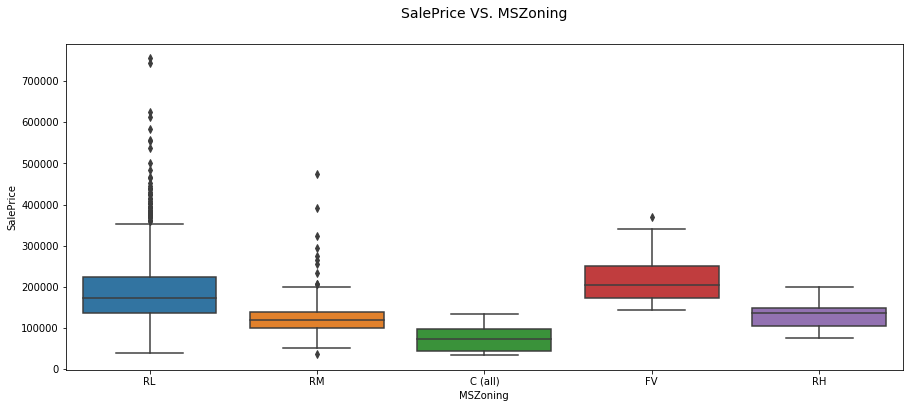

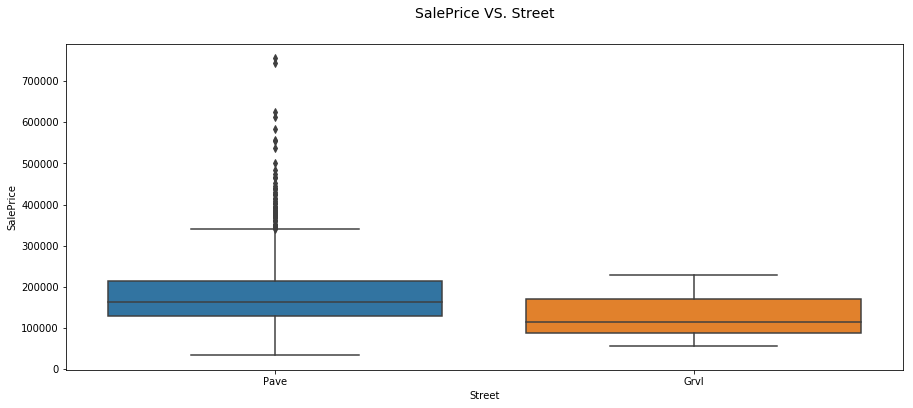

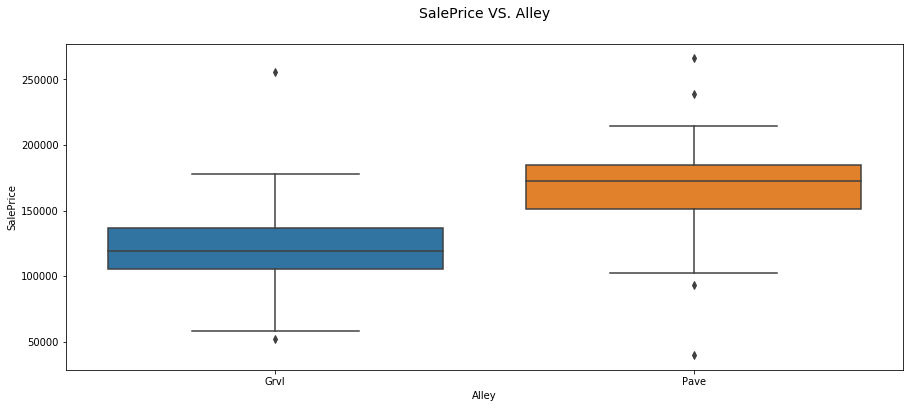

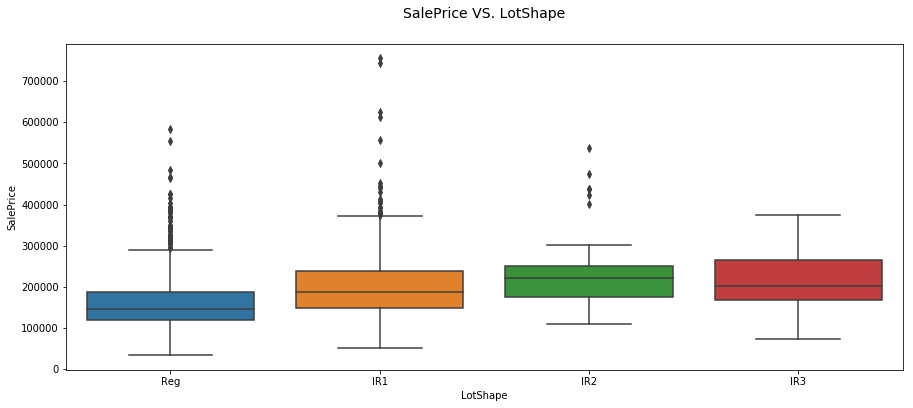

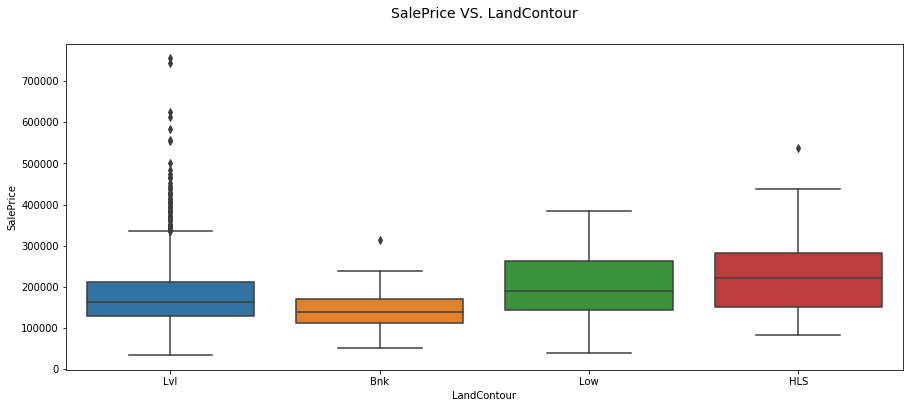

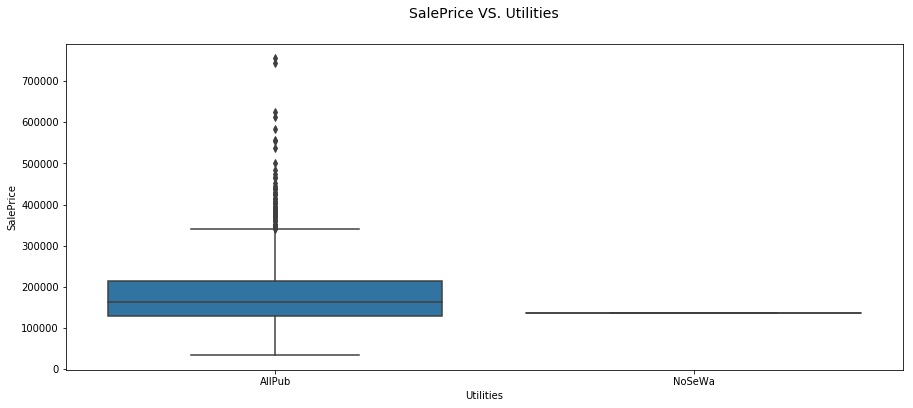

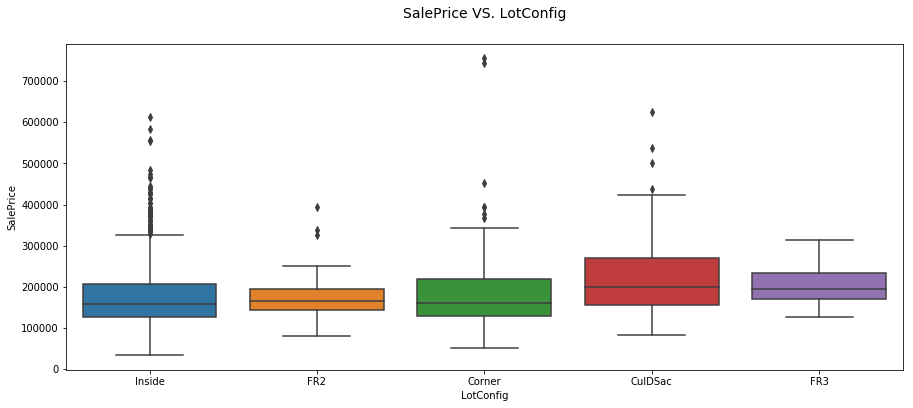

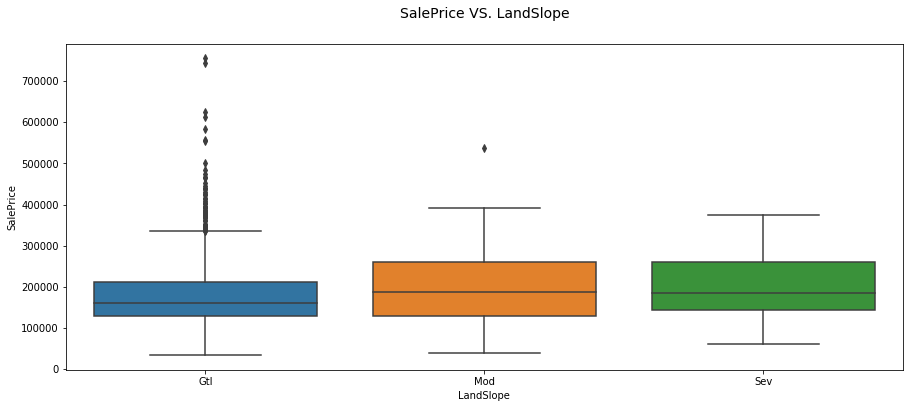

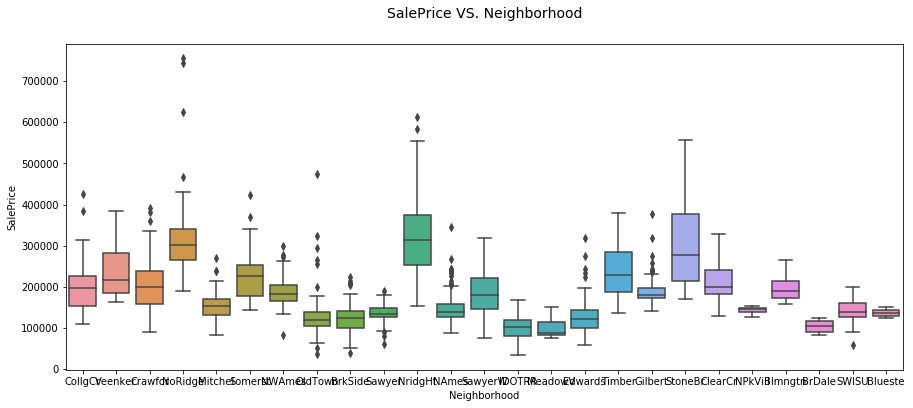

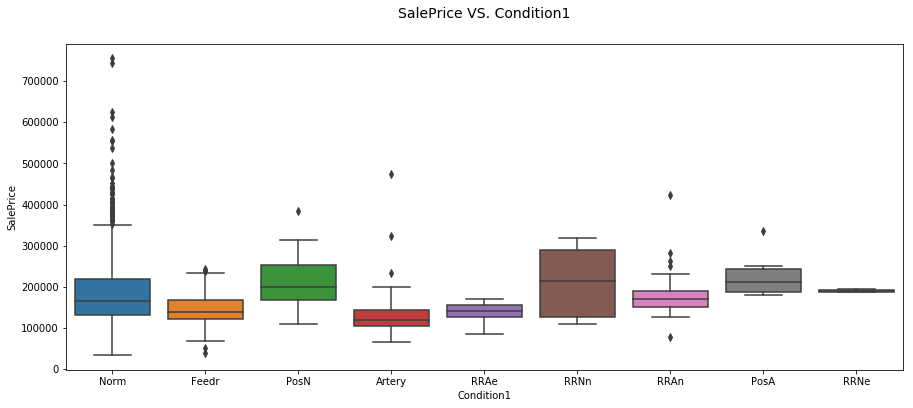

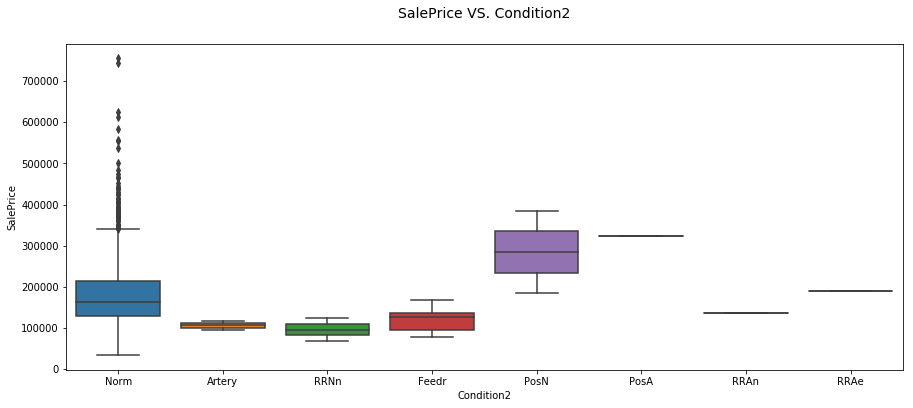

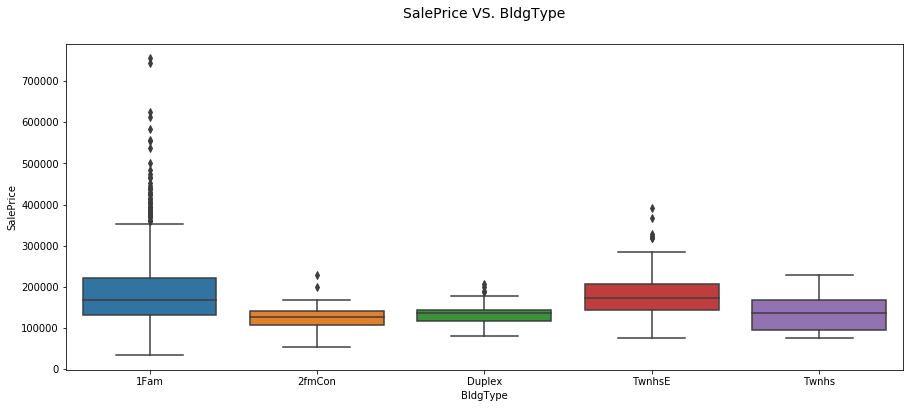

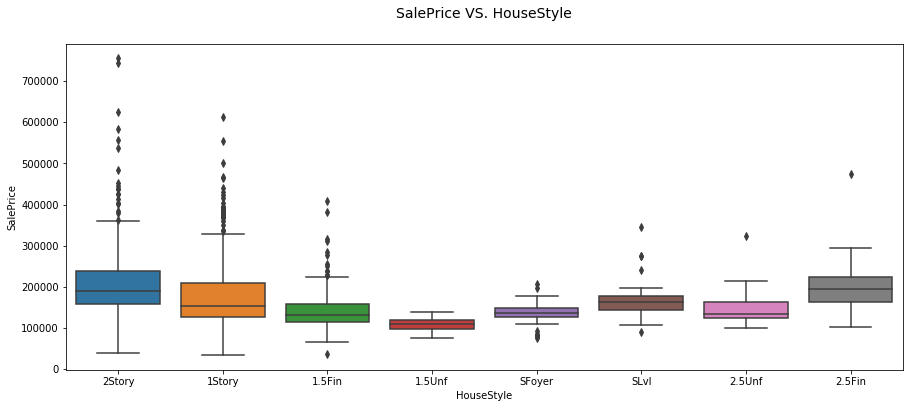

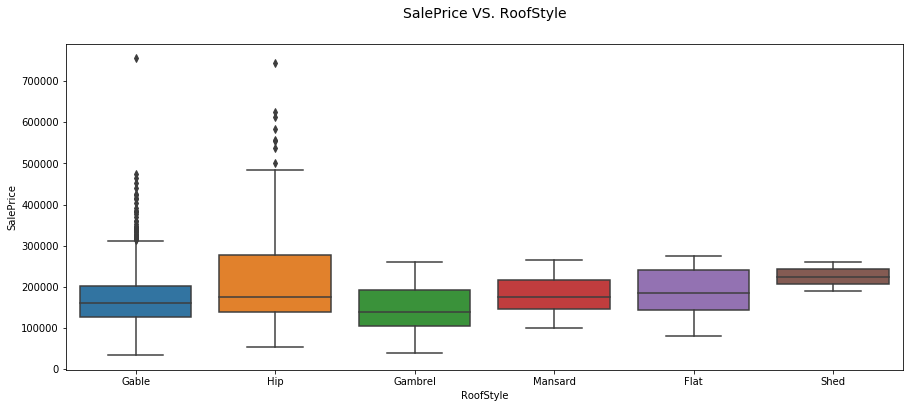

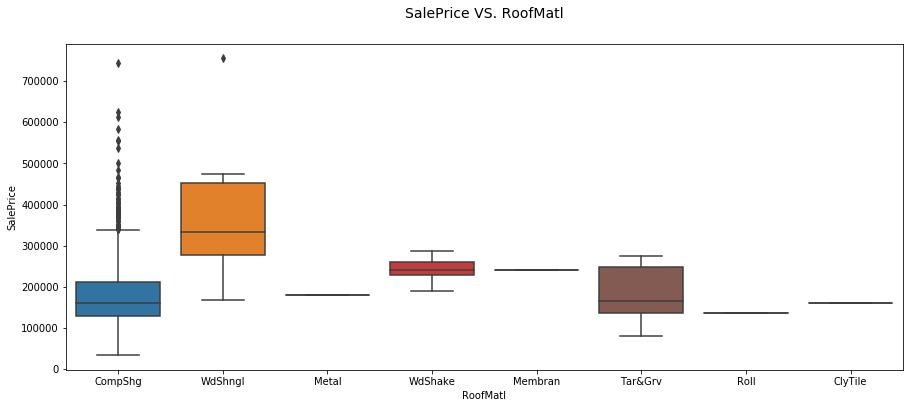

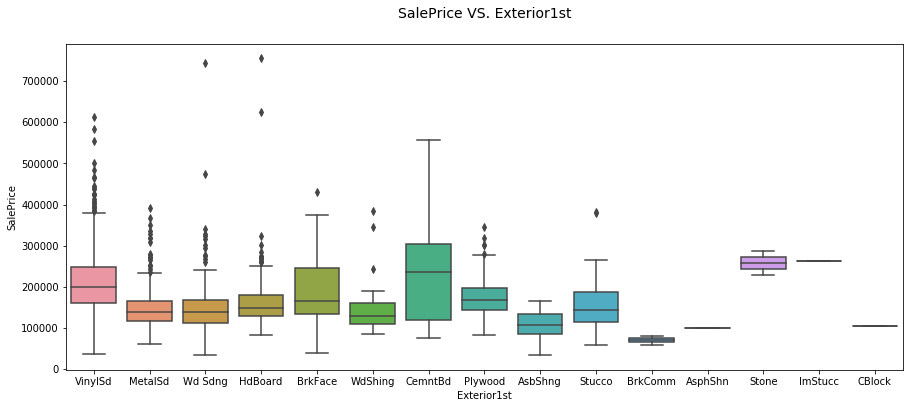

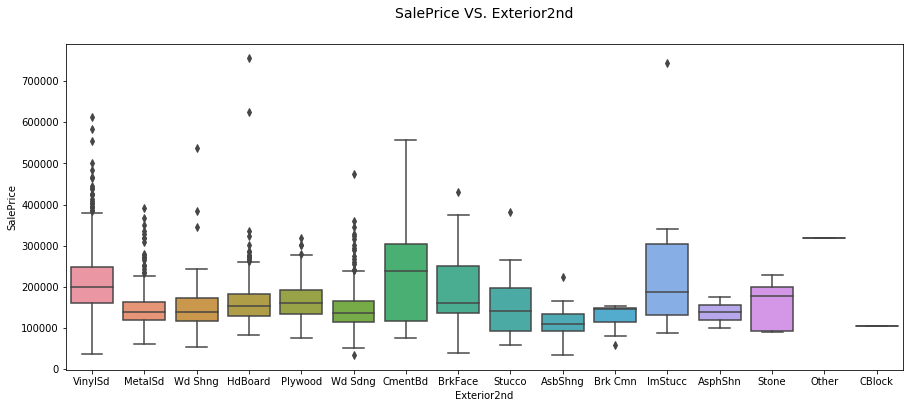

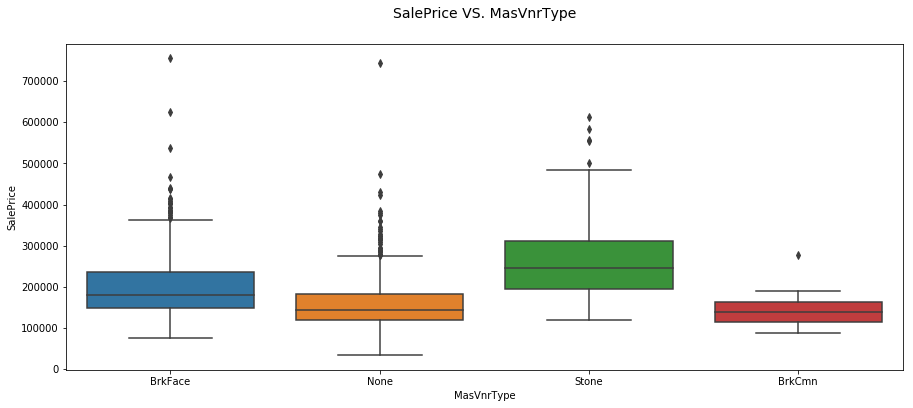

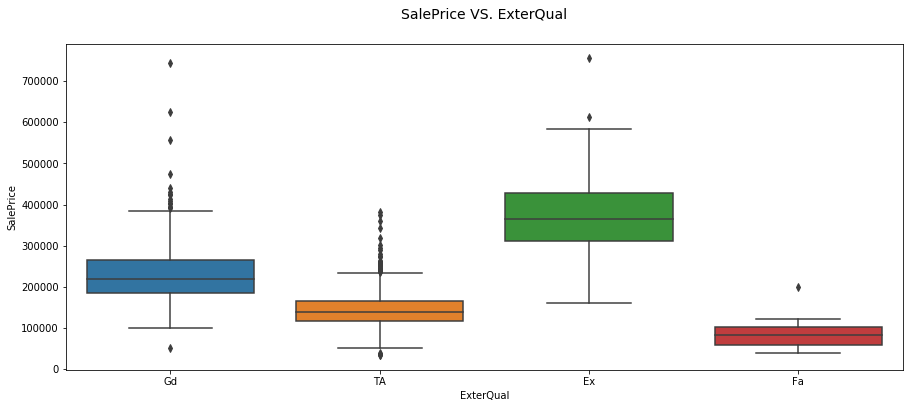

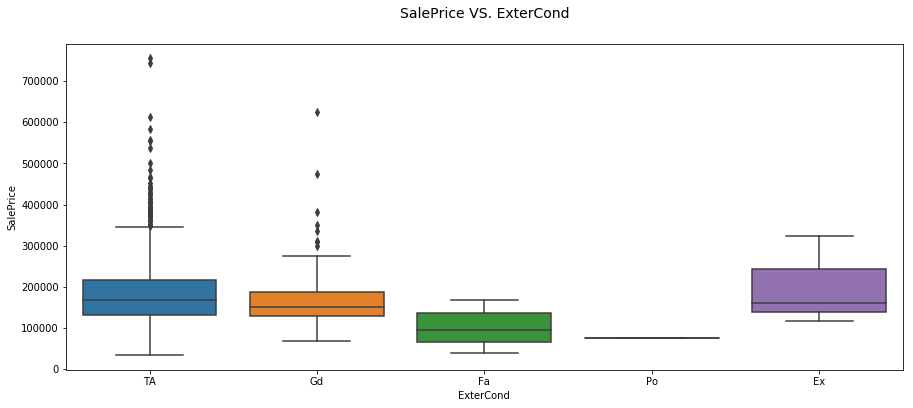

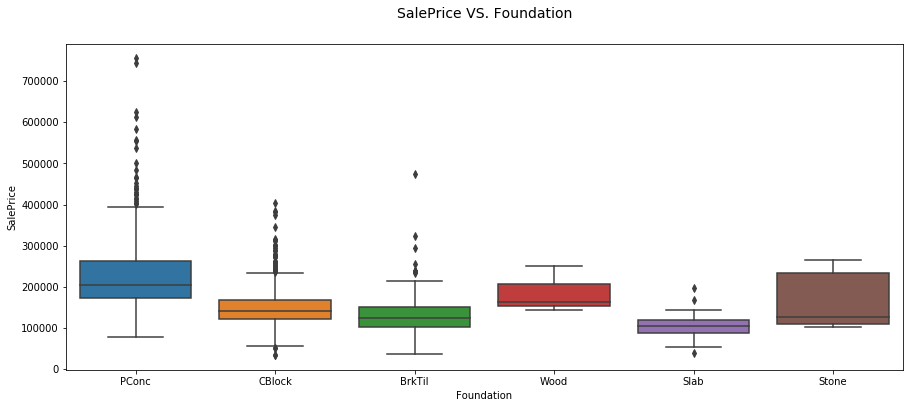

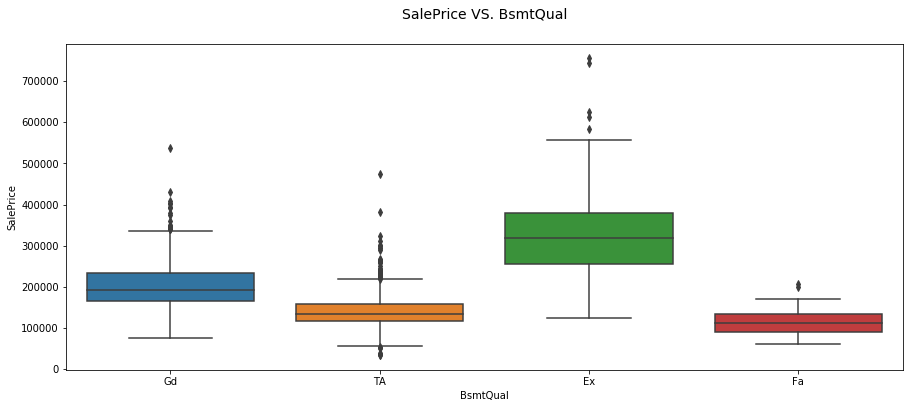

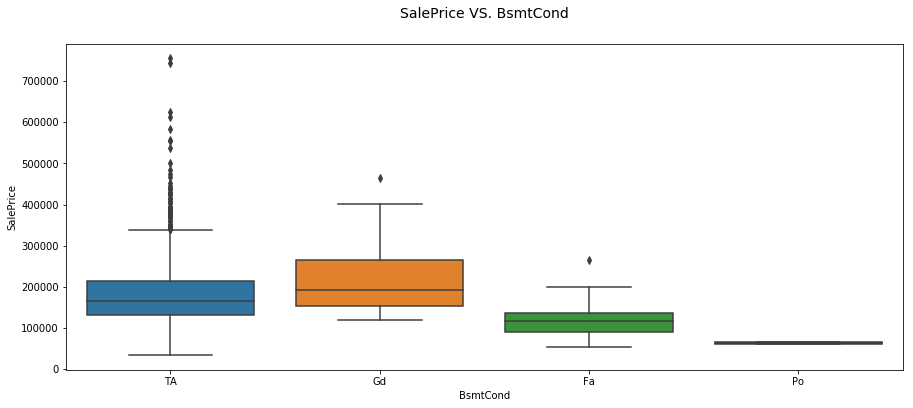

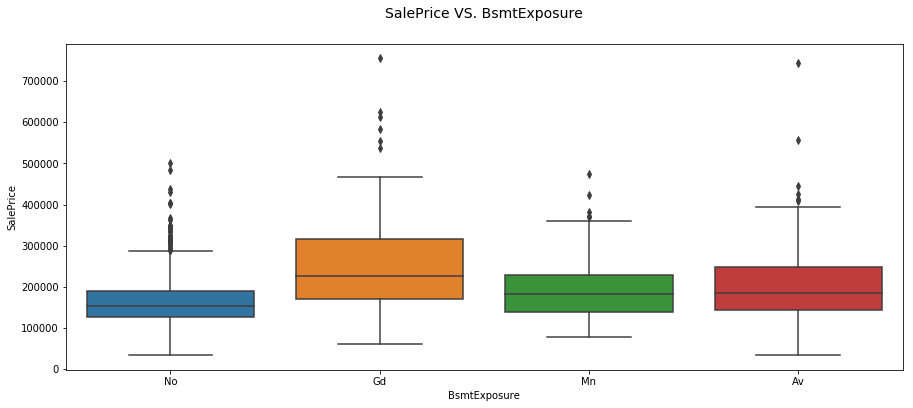

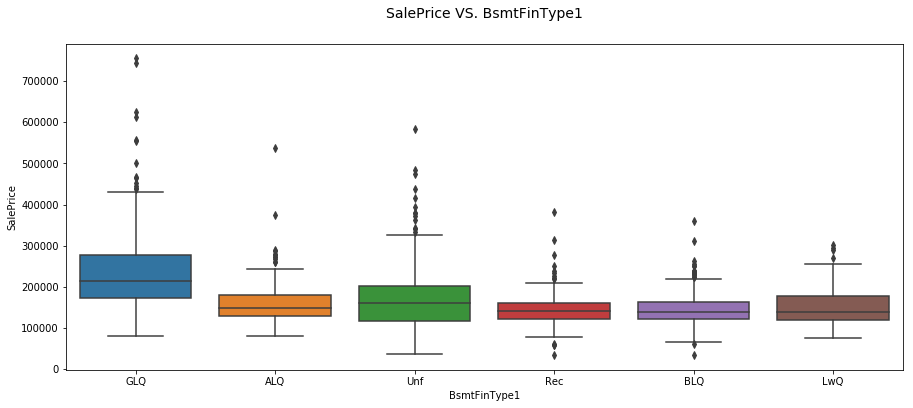

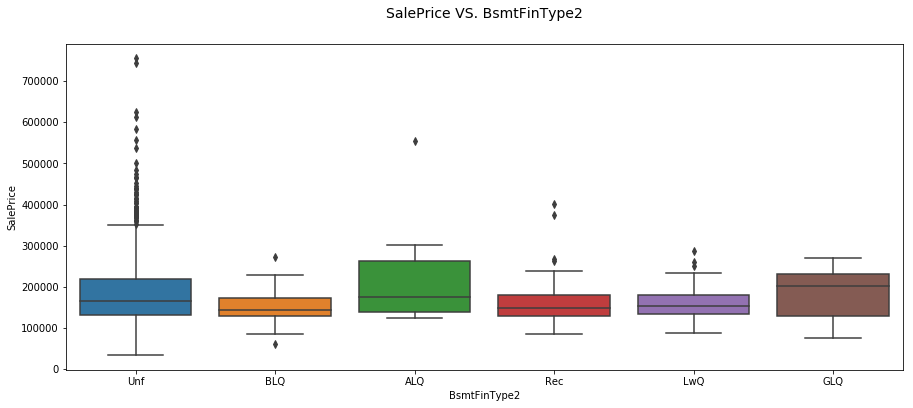

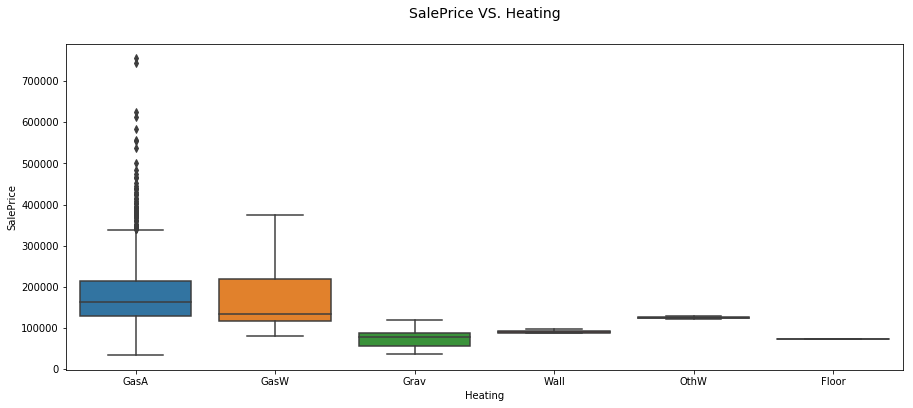

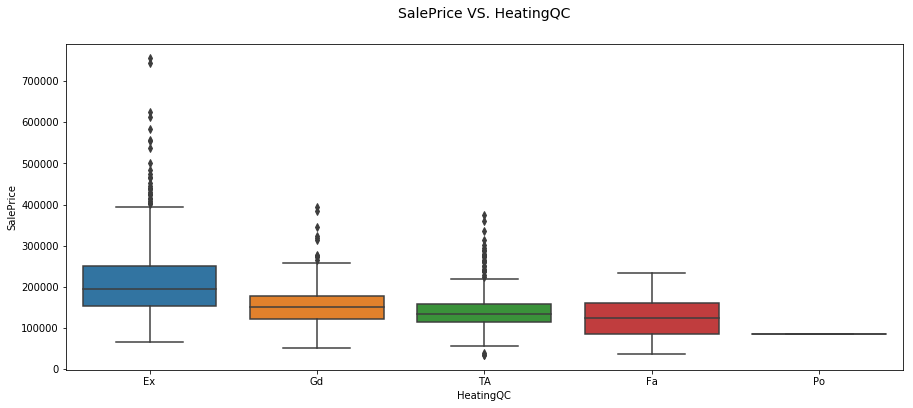

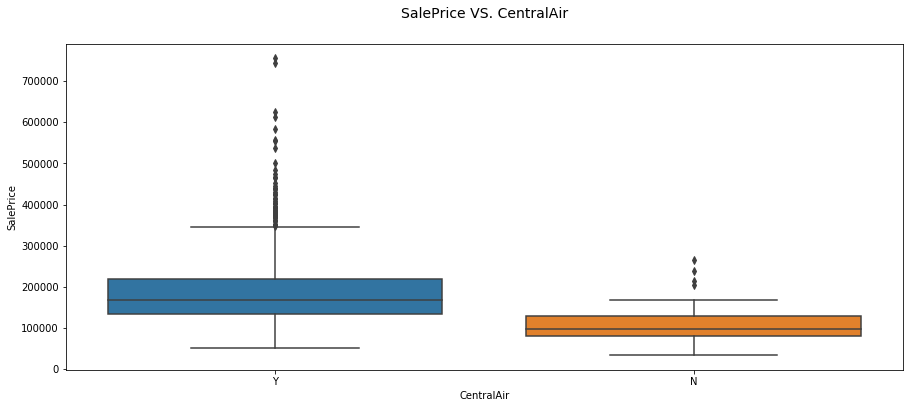

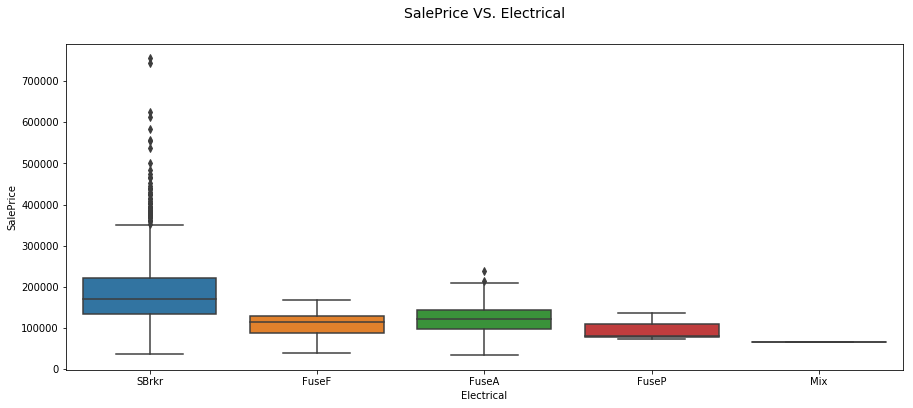

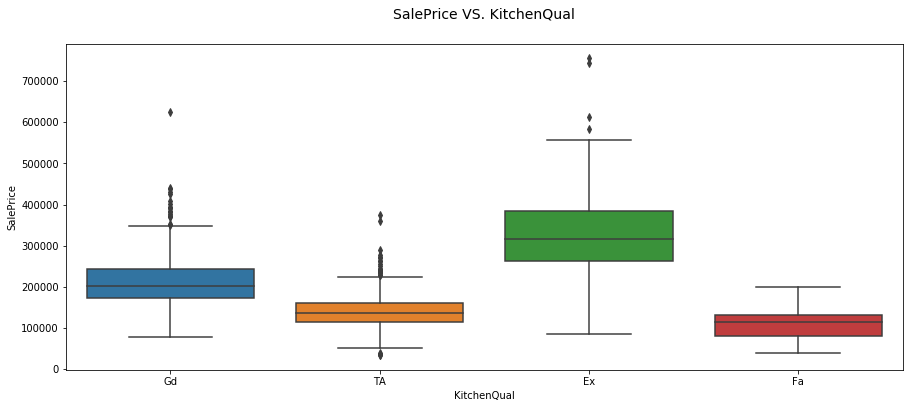

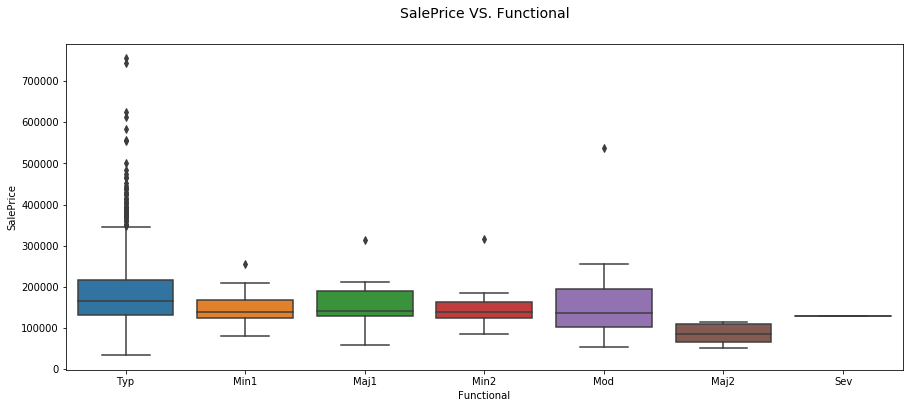

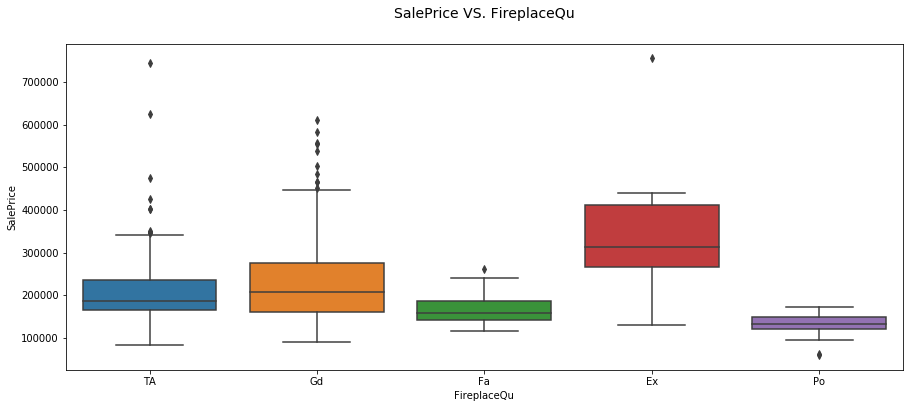

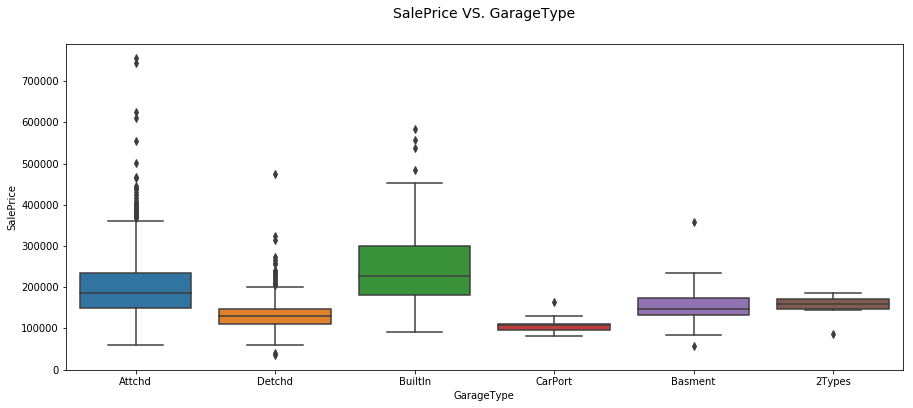

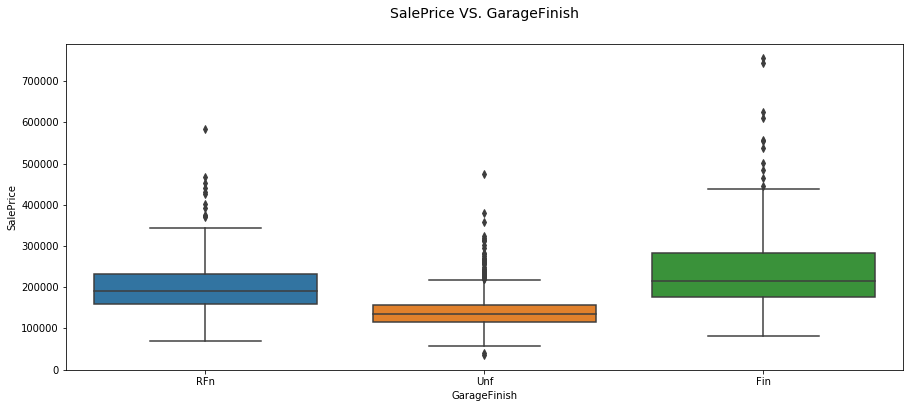

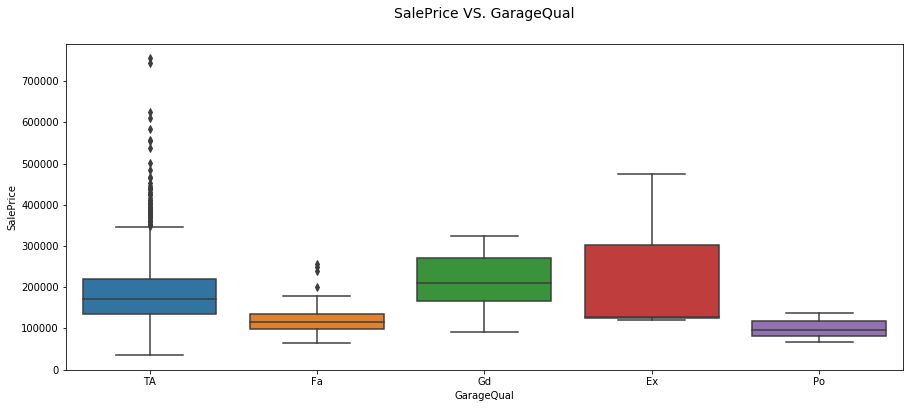

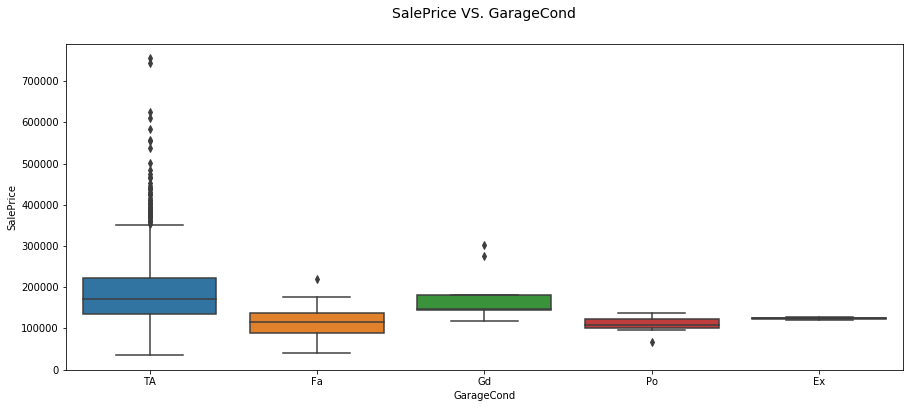

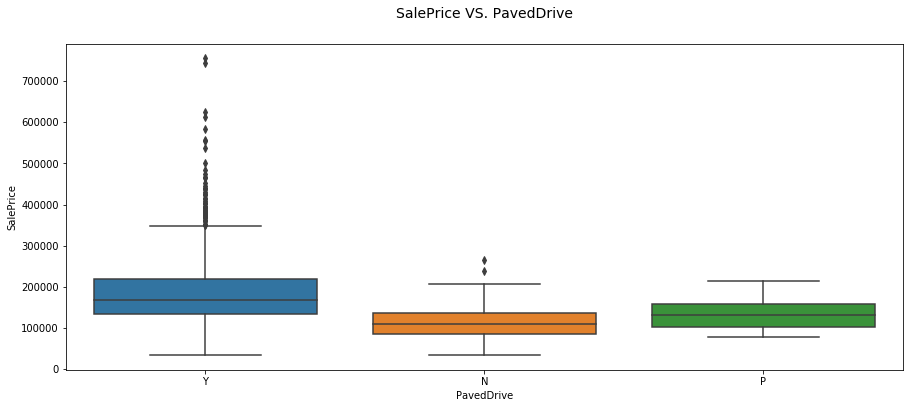

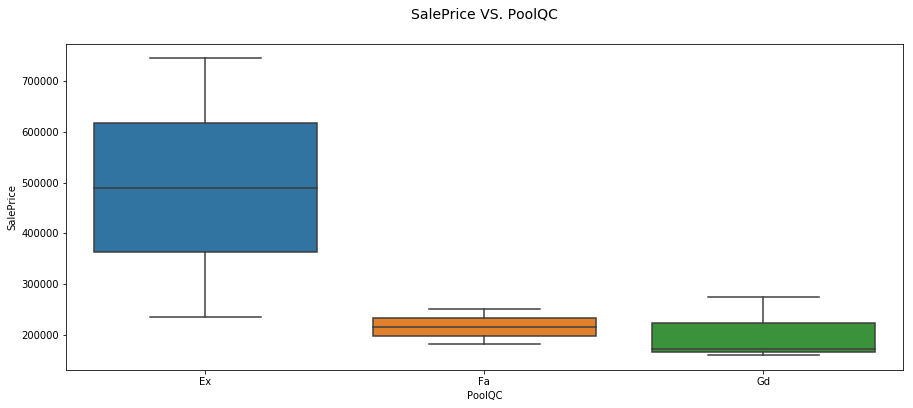

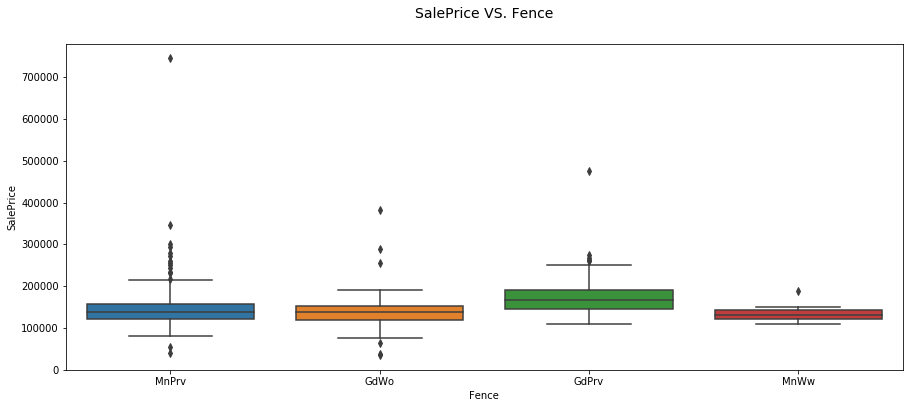

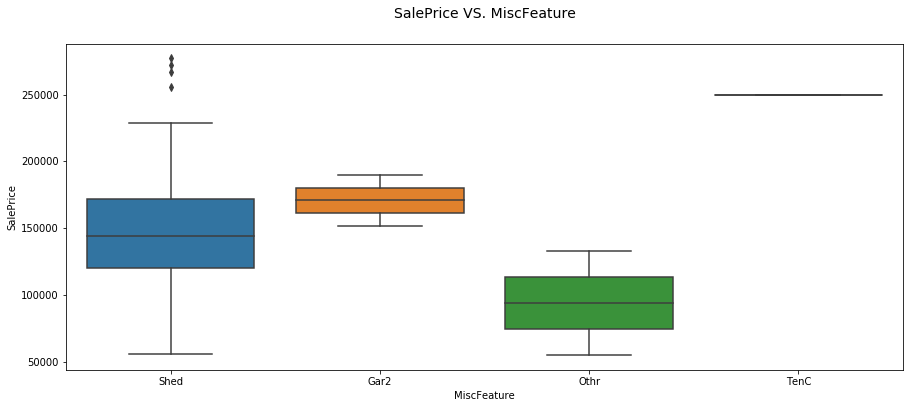

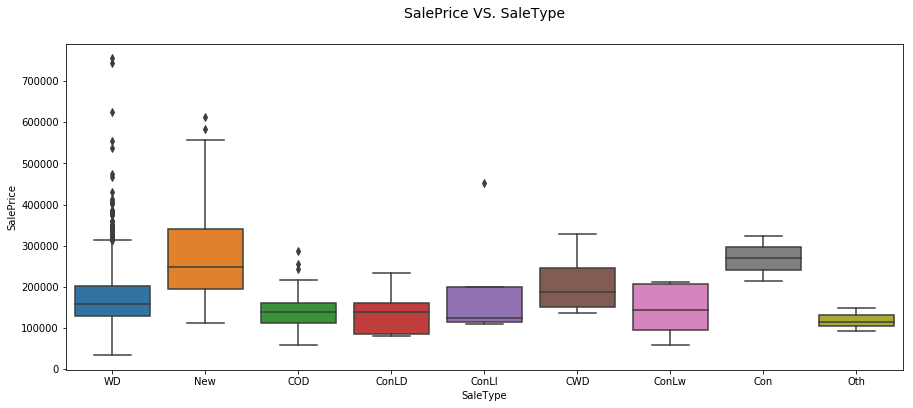

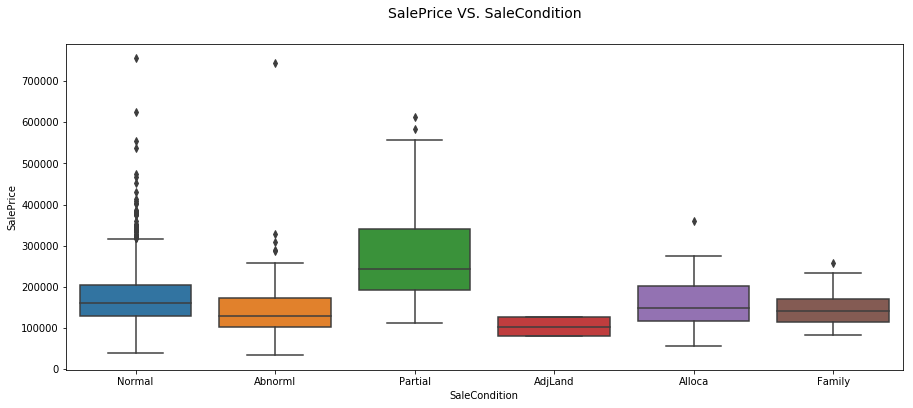

In [6]:
for i in range(len(df_train.columns)):
    if df_train[df_train.columns[i]].dtype == object:
                plt.subplots(figsize=(15,6))
                sns.boxplot(y=df_train['SalePrice'], x=df_train[df_train.columns[i]])
                plt.title('SalePrice VS. '+(df_train.columns[i]), y=1.06, fontsize=14)
                plt.ylabel('SalePrice')
                plt.xlabel(str(df_train.columns[i]))
                

After graphical visualization of the categorical feature, here some of the variables are showing nonlinear relation with the target feature whereas some are showing linearity. However all the independent features are kept here for better result.




# SALEPRICE'S RELATIONSHIP WITH NUMERICAL VARIABLES

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
(df_train.corr())["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

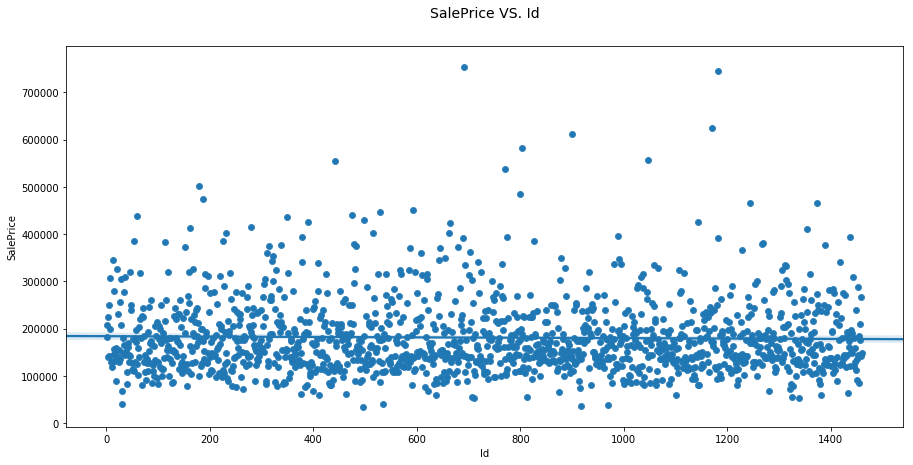

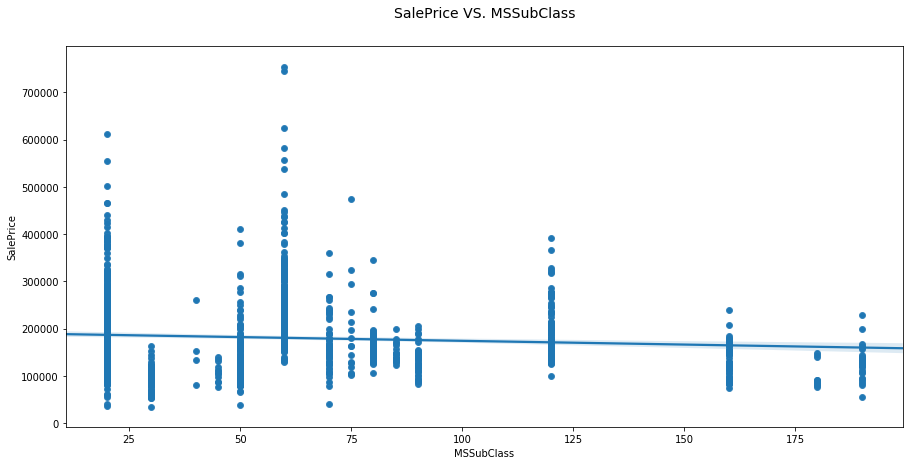

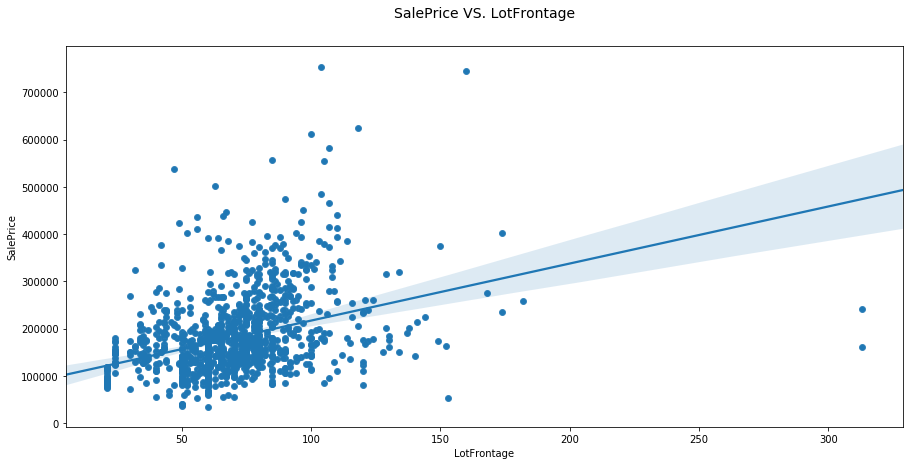

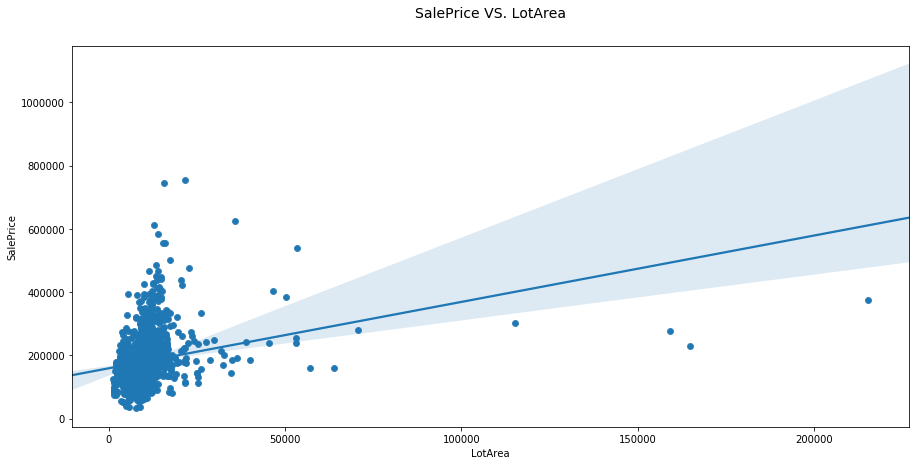

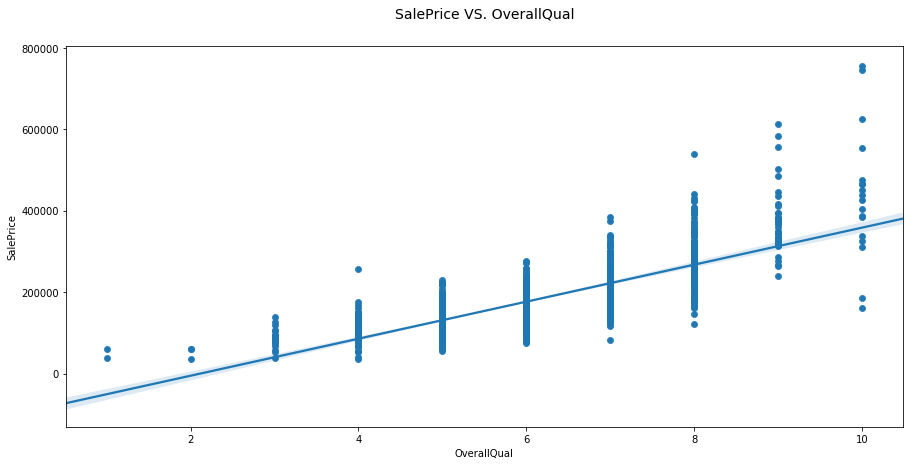

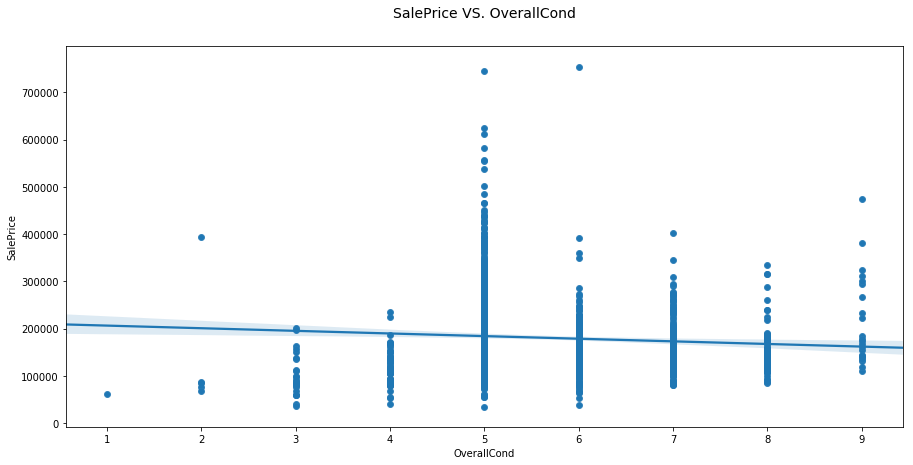

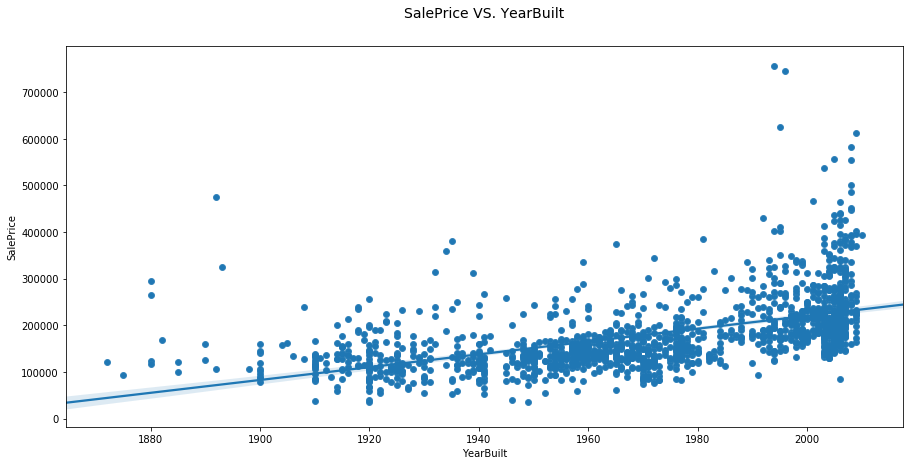

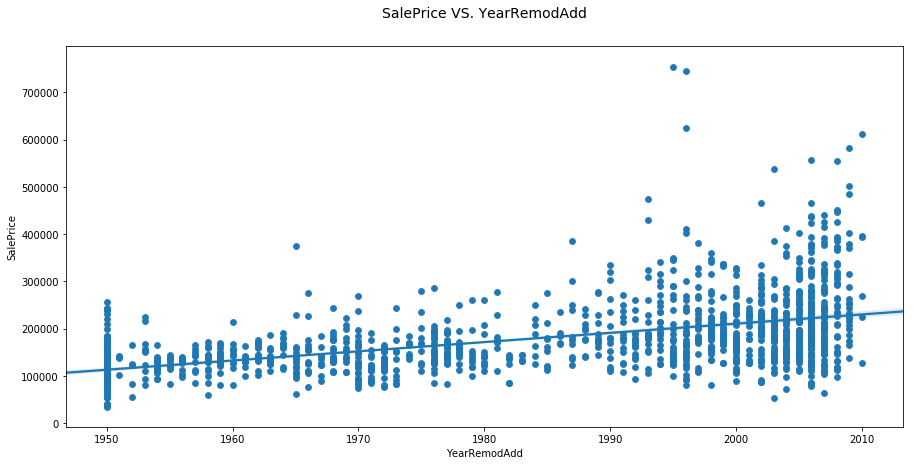

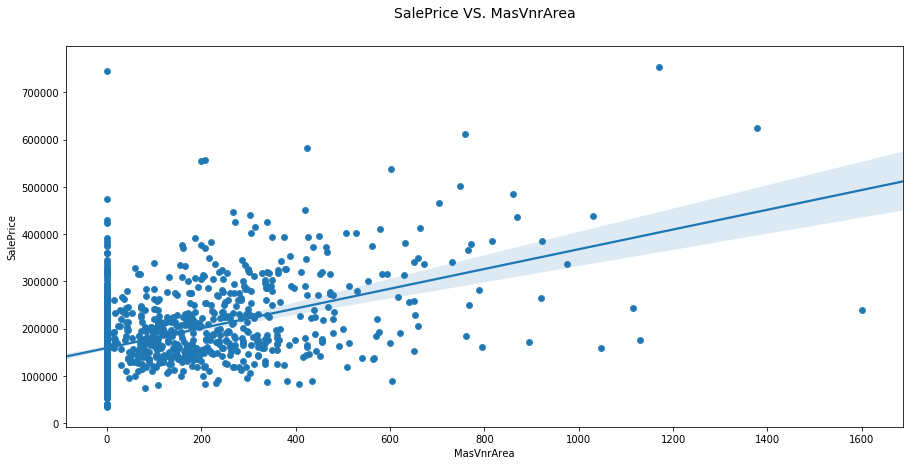

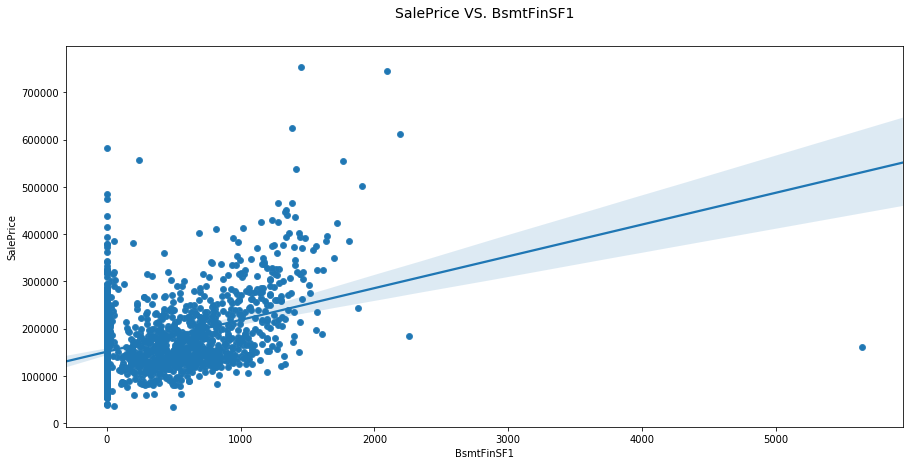

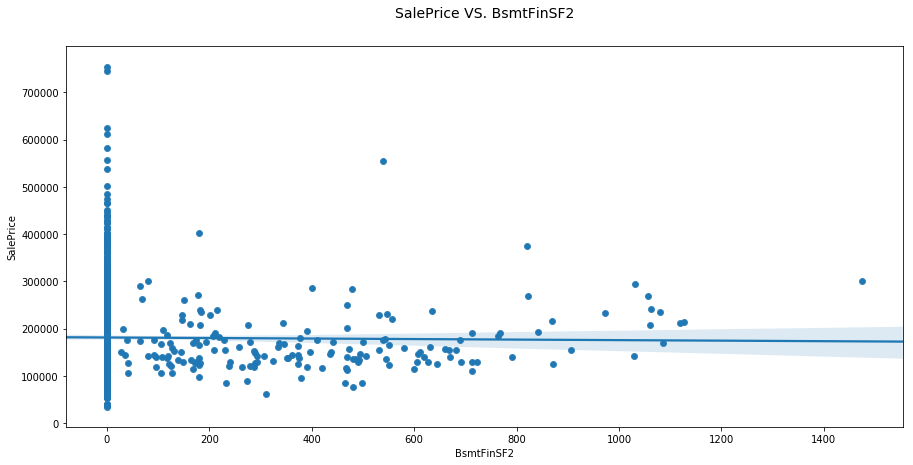

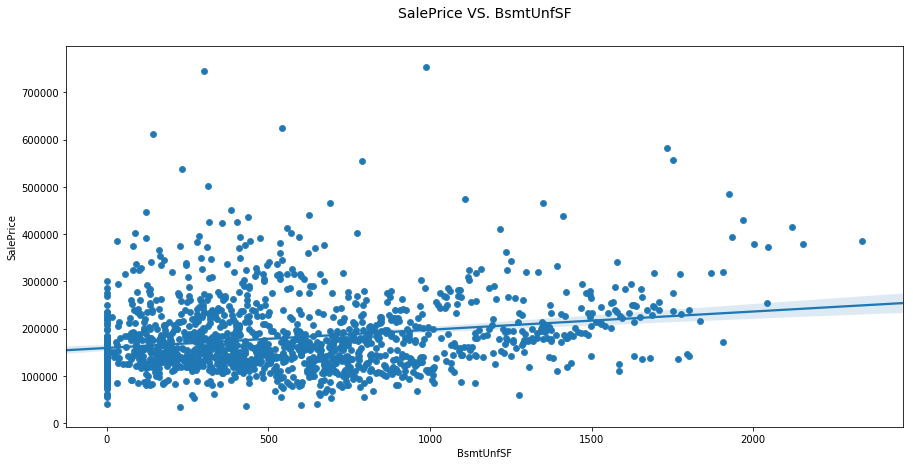

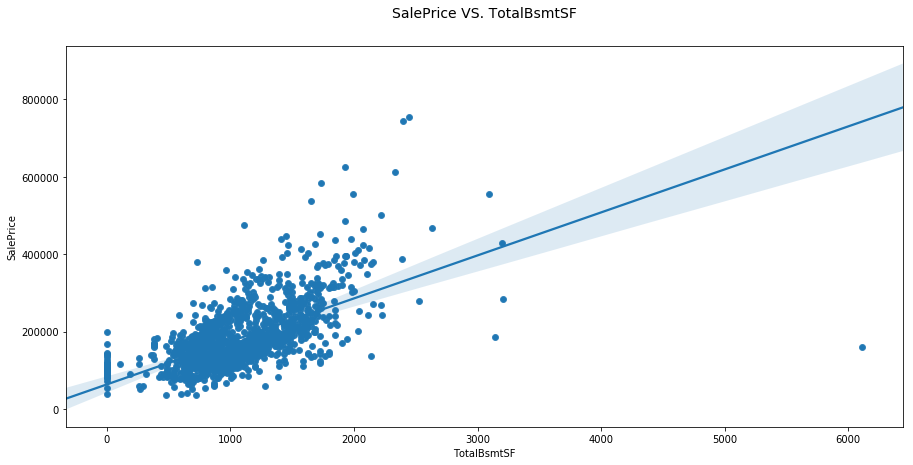

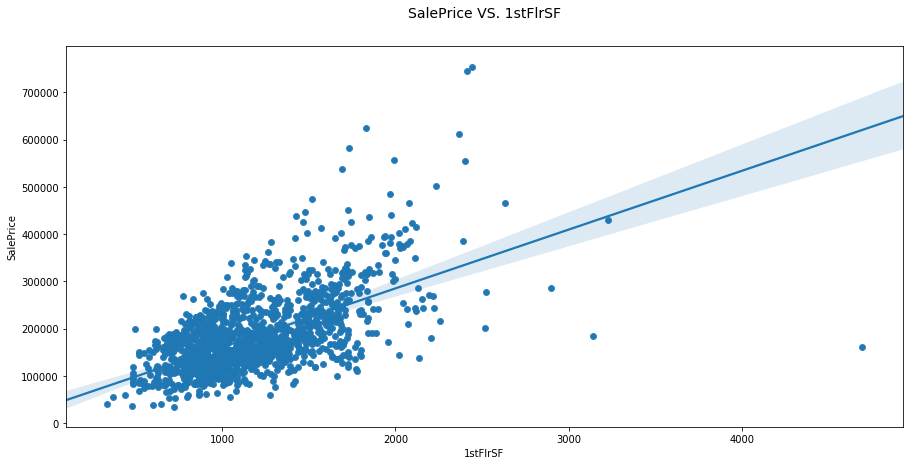

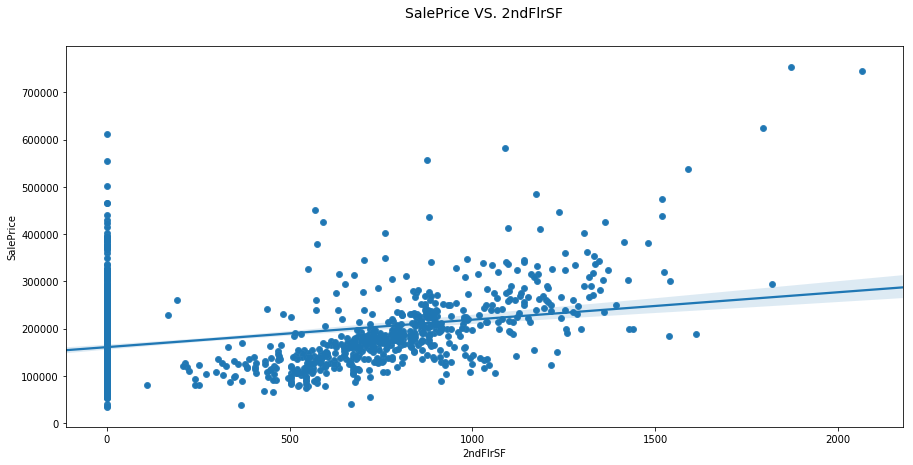

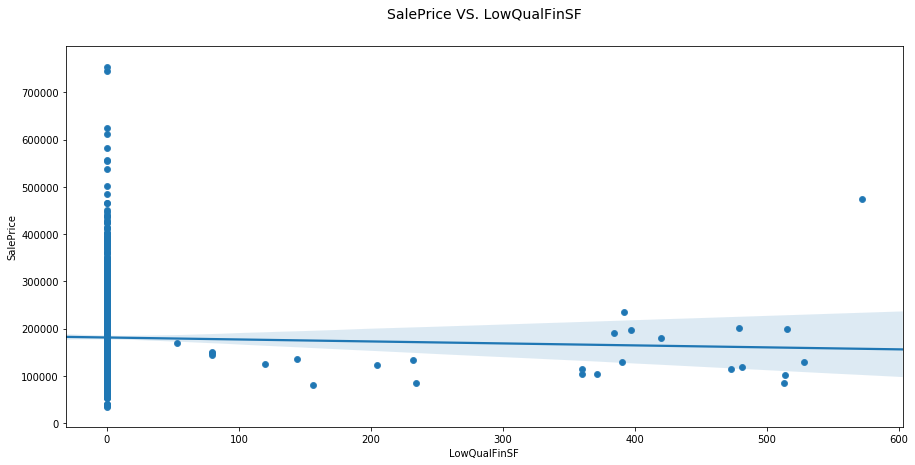

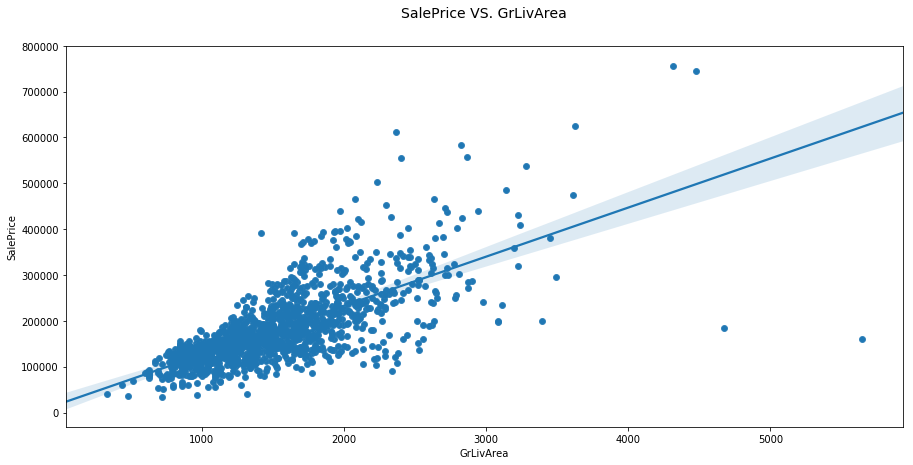

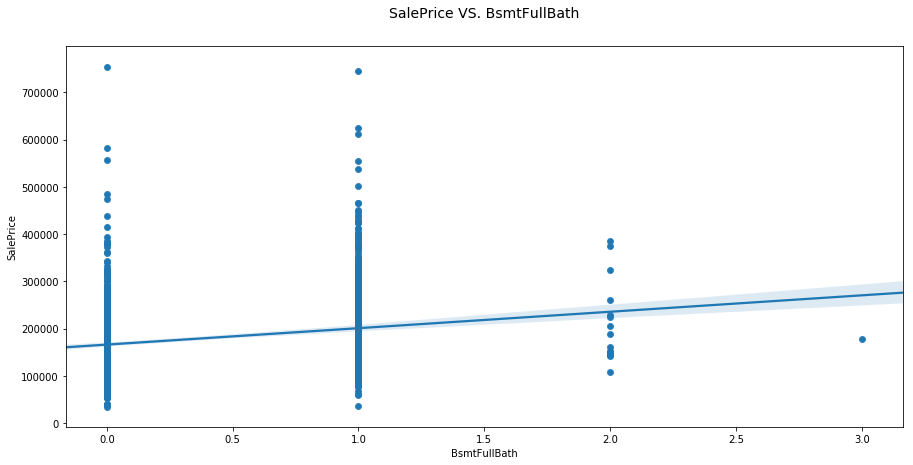

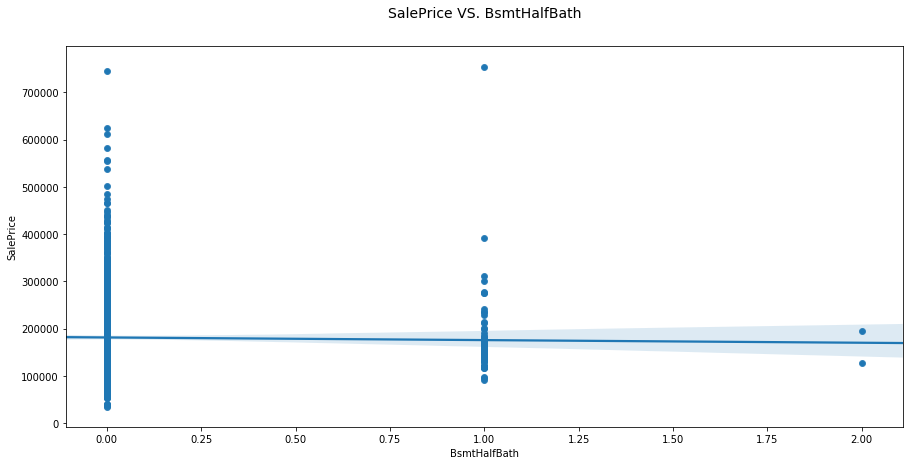

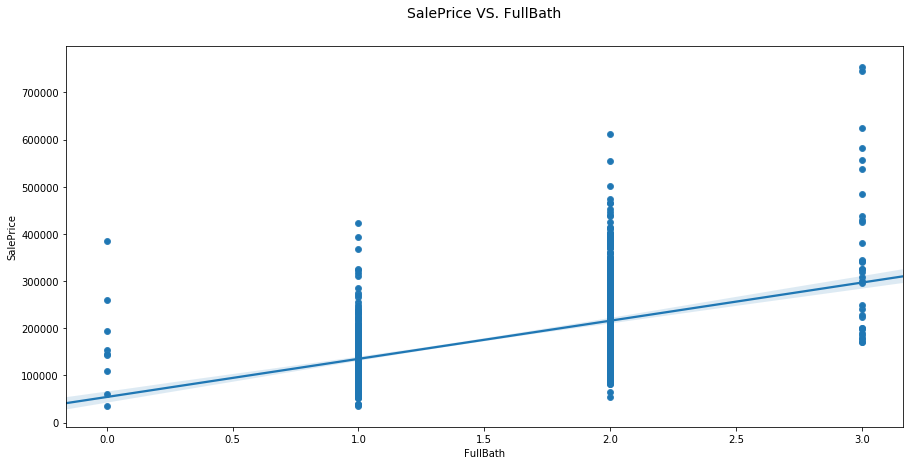

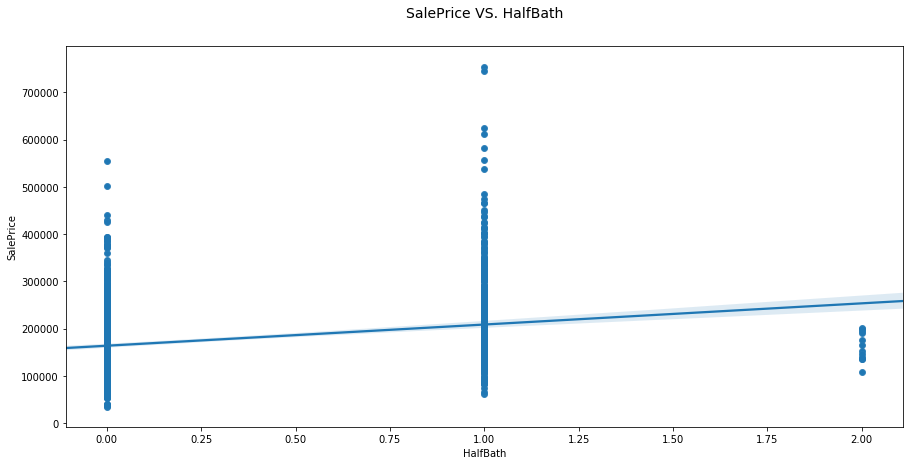

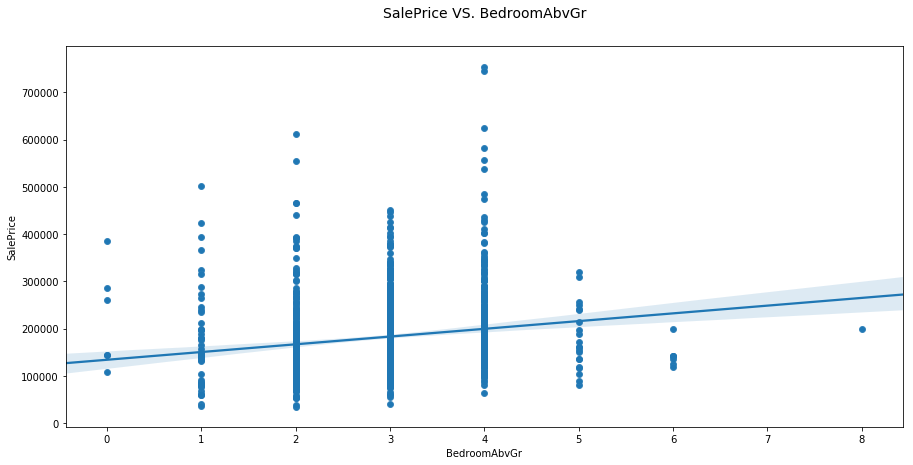

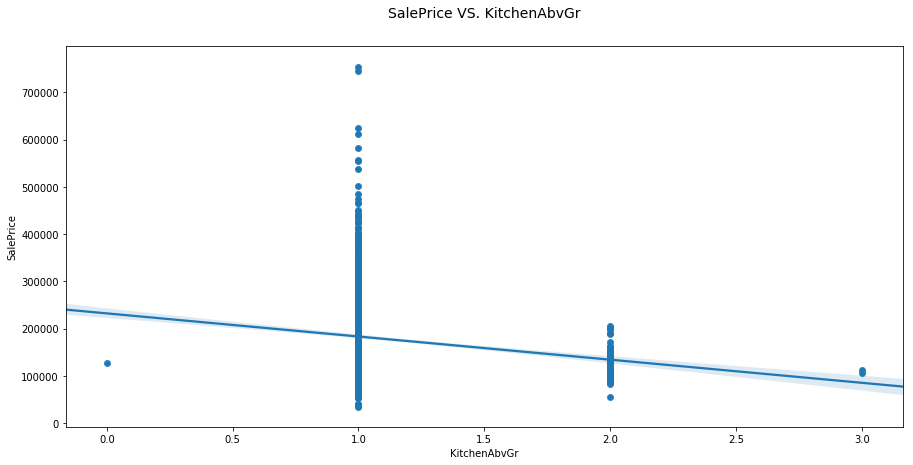

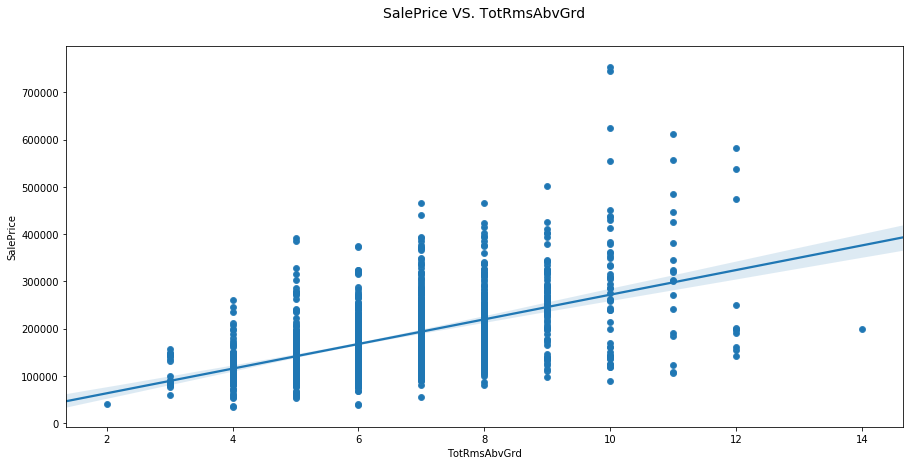

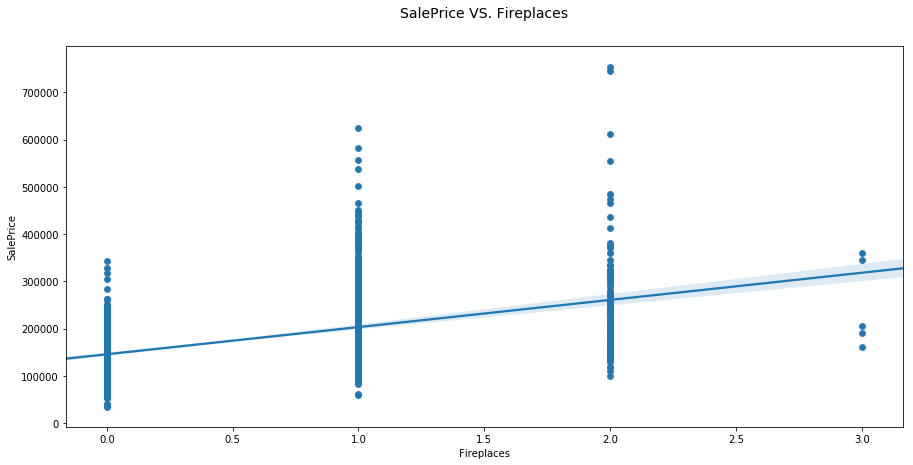

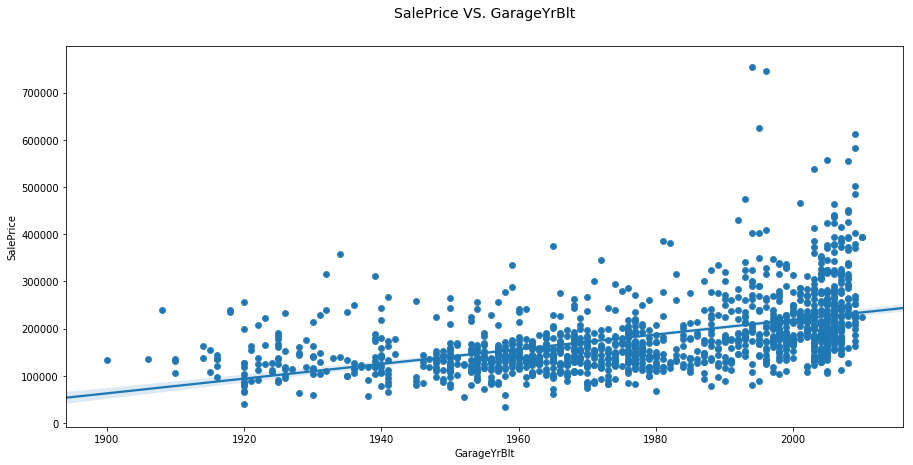

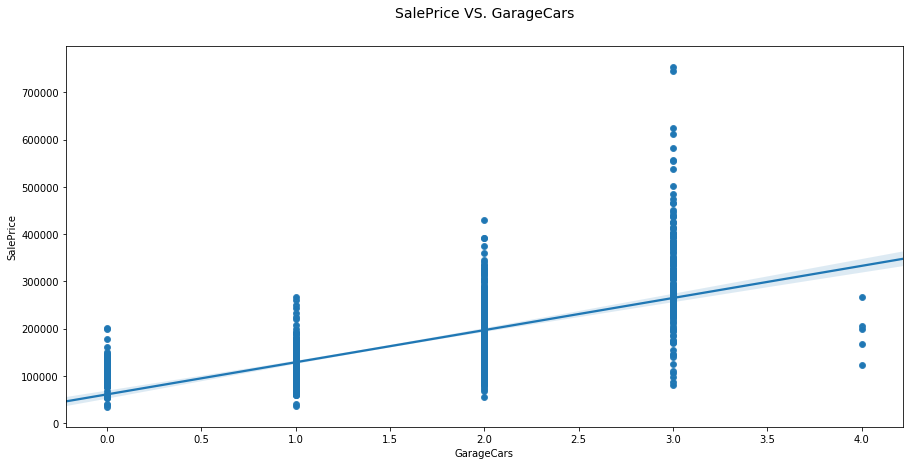

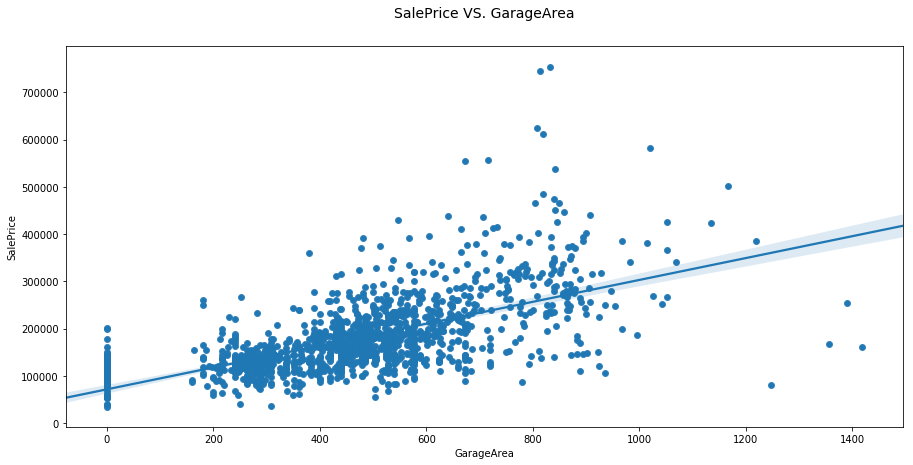

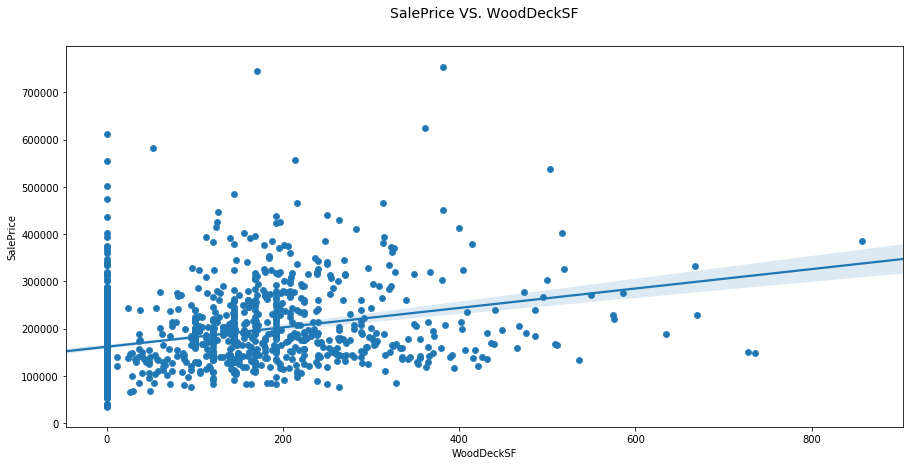

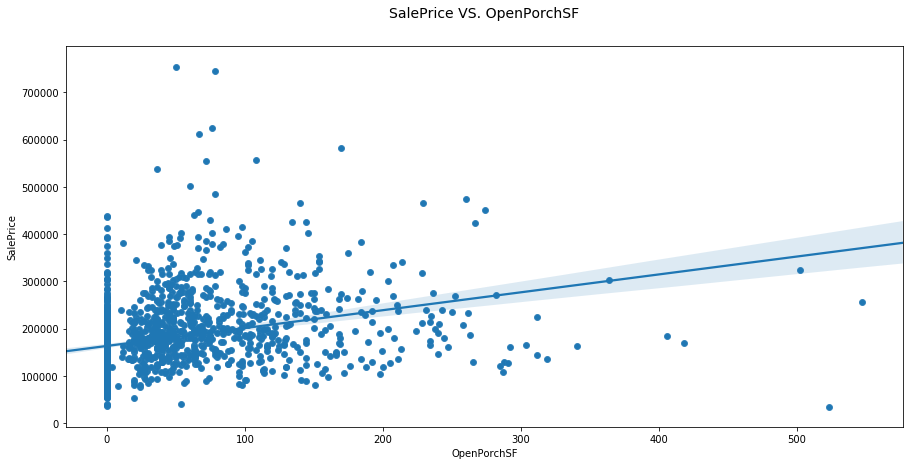

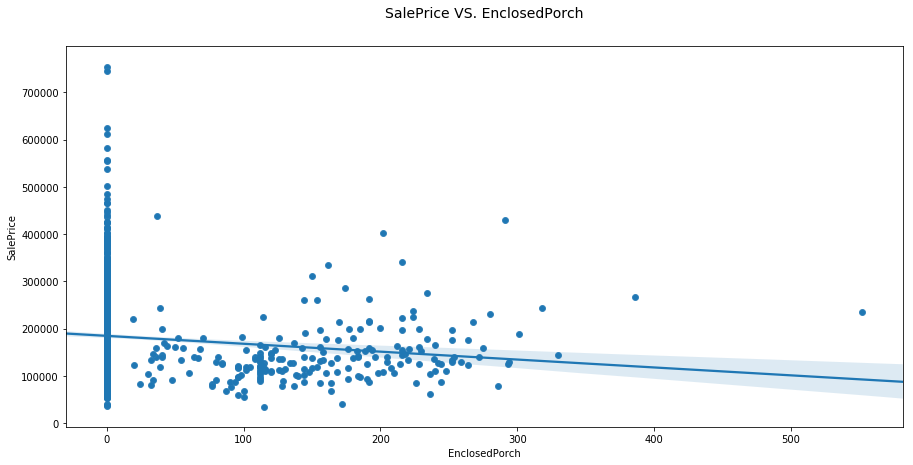

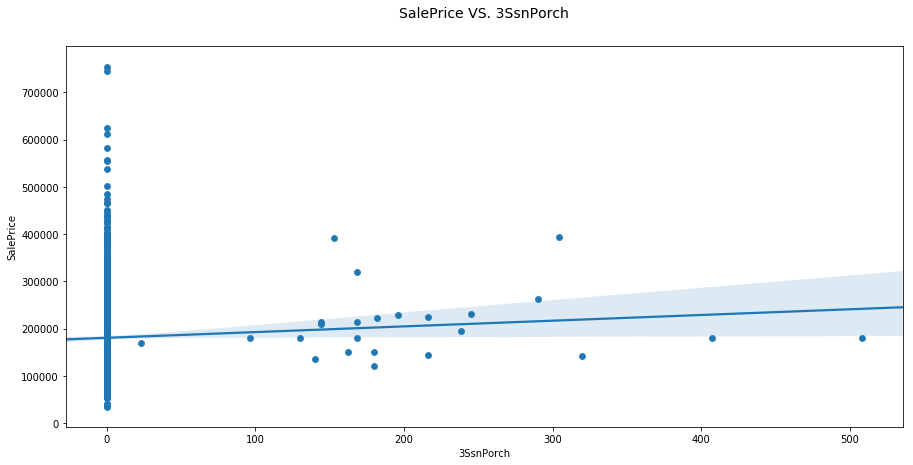

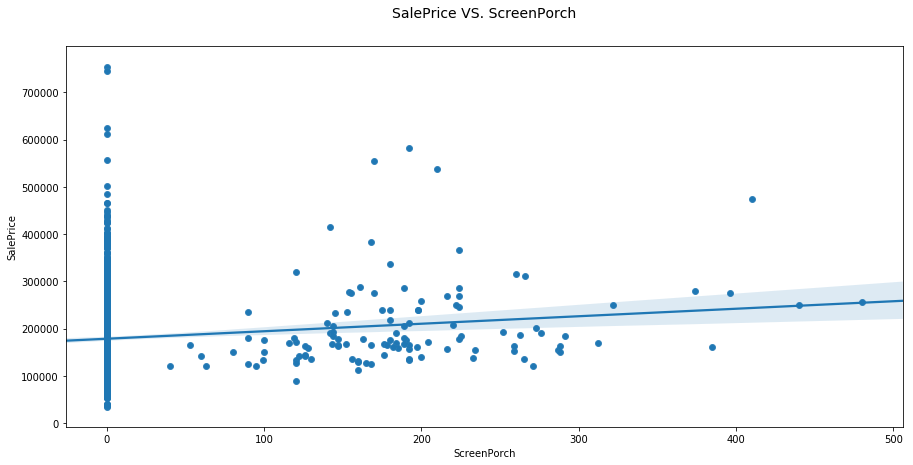

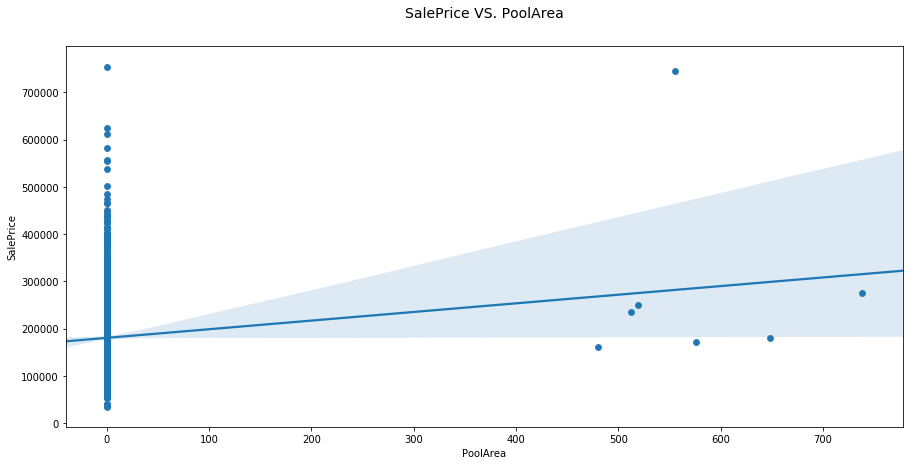

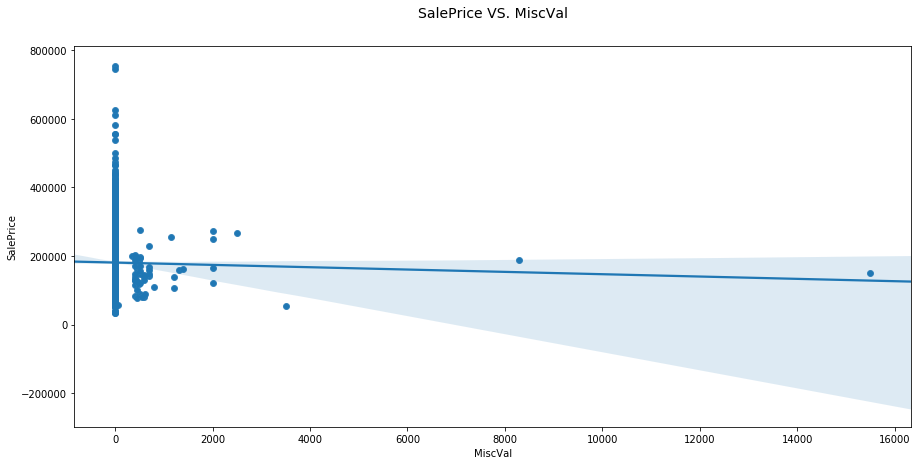

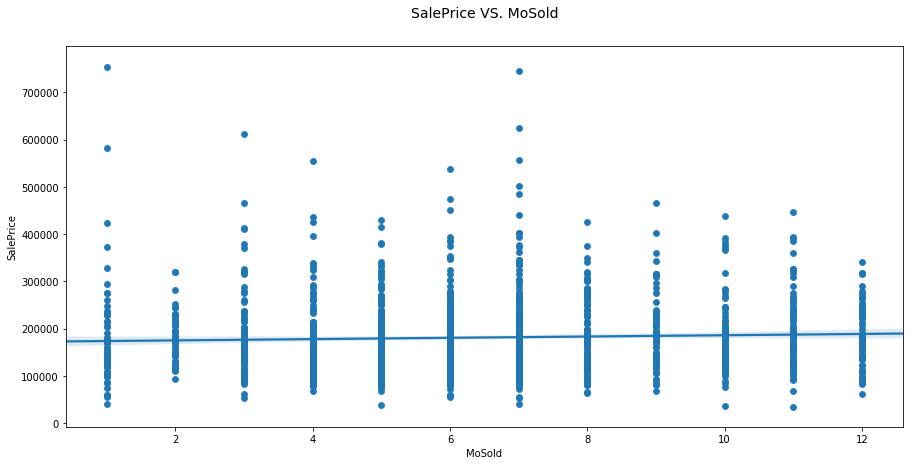

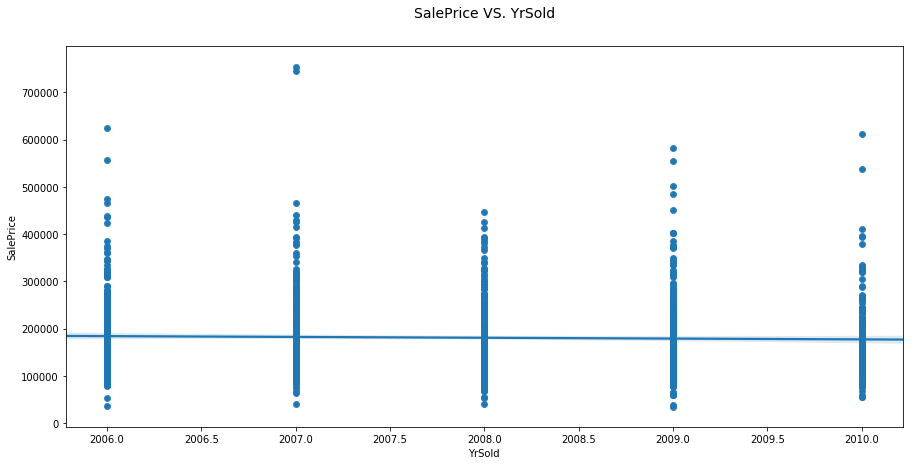

In [9]:
for i in range(len(df_train.columns)-1):
    if df_train[df_train.columns[i]].dtype != object:
                fig,ax1 = plt.subplots(figsize=(15,7), sharey= False)
                sns.scatterplot(y=df_train['SalePrice'], x=df_train[df_train.columns[i]],ax=ax1)
                sns.regplot(y=df_train['SalePrice'],  x=df_train[df_train.columns[i]], ax=ax1)
                plt.title('SalePrice VS. '+(df_train.columns[i]), y=1.06, fontsize=14)
                plt.ylabel('SalePrice')
                plt.xlabel(str(df_train.columns[i]))


# OBSERVATIONS FROM THE REGRESSION PLOTS FOR NUMERICAL VARIABLES

1. Target feature "SalePrice" shows an unequal level of variance across most predictor(independent) variable values. This is called Heteroscedasticity, which is not desired for the multiple linear regression model.

2. There are many outliers in the scatter plots. 

3. Only "SalePrice" vs. "GrLivArea" seems to follow a trend. So this can be said that sale price increased due to increase in ground living area. Linear Regression show that independent variable GrLivArea is linear with dependent variable SalePrice.
 

# DELETING OUTLIERS

In [10]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [11]:
df_train = df_train.drop(df_train[df_train.Id == 1299].index)
df_train = df_train.drop(df_train[df_train.Id == 524].index)

GrLivArea is showing linear relation with SalePrice almost perfectly except these two. Deleting the rows will give better results.

# CORRELATION MATRIX

Multicollinearity is not desired in Linear Regression. From Heatmap the correlation among the independent features can be visualised easily.

Text(0.5, 1.0, 'Heatmap of All the Features')

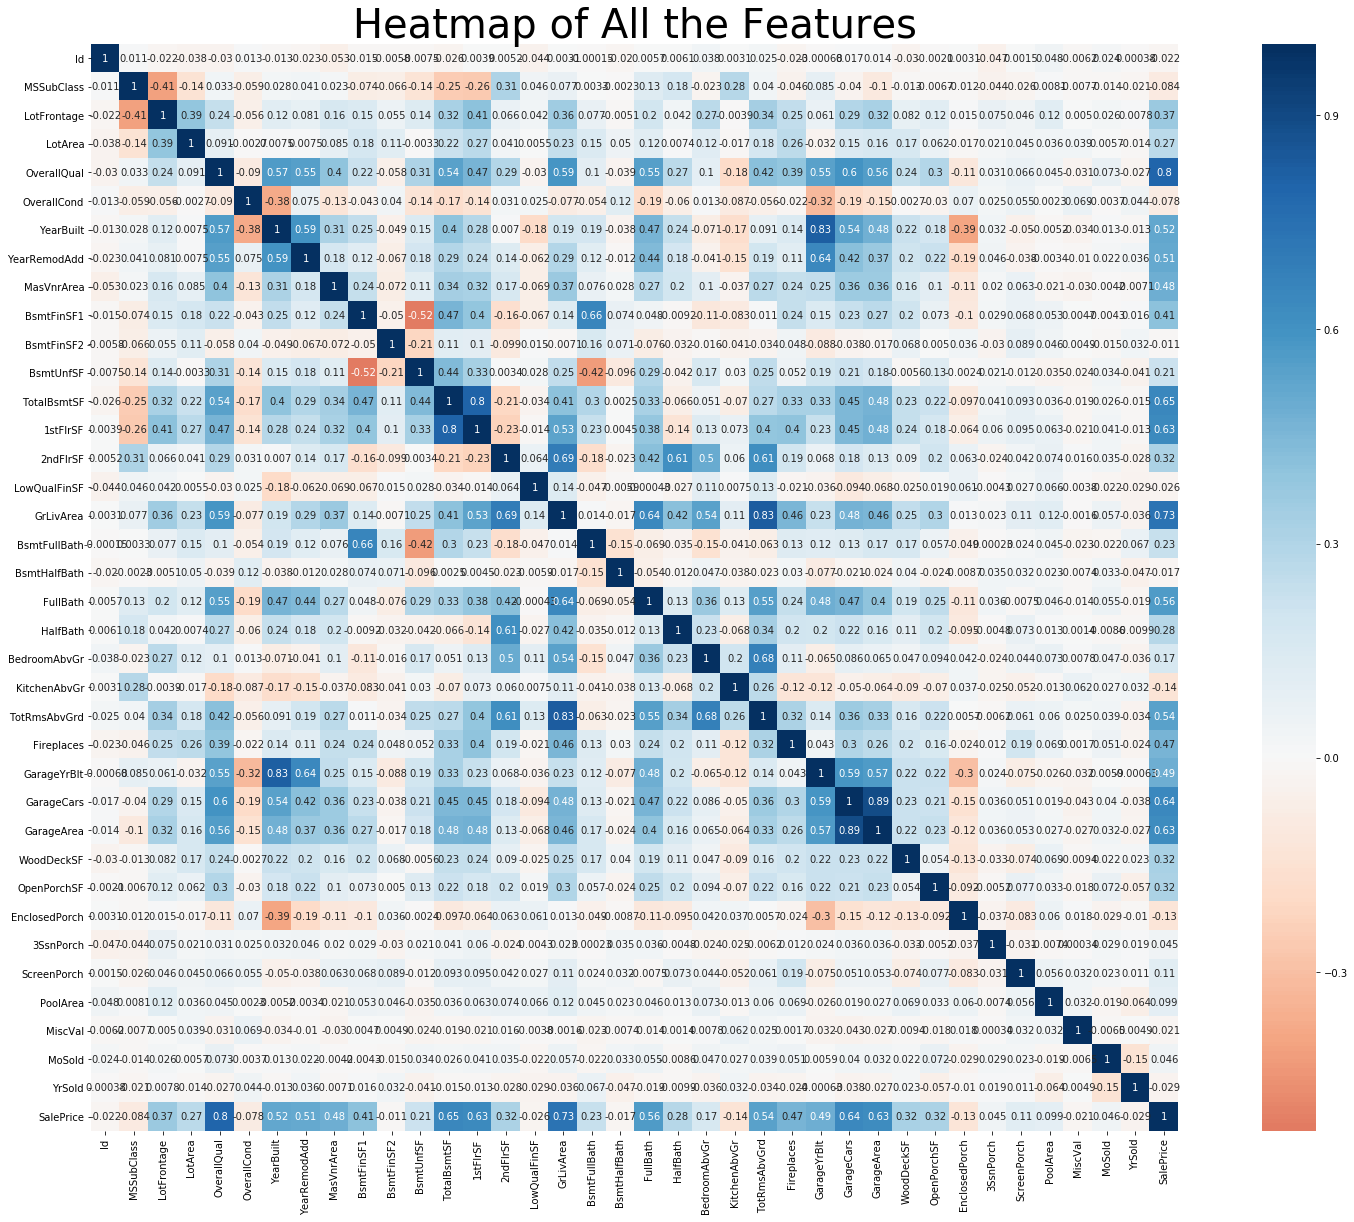

In [12]:
corrmat = df_train.corr()
f, ax= plt.subplots(figsize=(30,20))
sns.heatmap(corrmat,annot=True,cmap="RdBu", square=True, center=0 )
plt.title("Heatmap of All the Features", fontsize = 40)

# OBSERVATION FROM THE HEATMAP
1. Some features are extremely correlated with each other.
2. GarageCars and GarageArea are 89 percent correlated.
3. 83 percent correlation between GrLivArea and TotRmsAbvGrd.
4. 80 percent correlation between TotalBsmtSF and 1stFlrSF.
5. 83 percent correlation between GarageYrBlt and YearBuilt.
5. Some other features also have good correlation with other independent features but poor correlation with dependent feature SalePrice.
     I am going to implement DNN model, I wont't delete these features. As these features also carry some weights and may affect the saleprice, so I will run the model considering all variables.

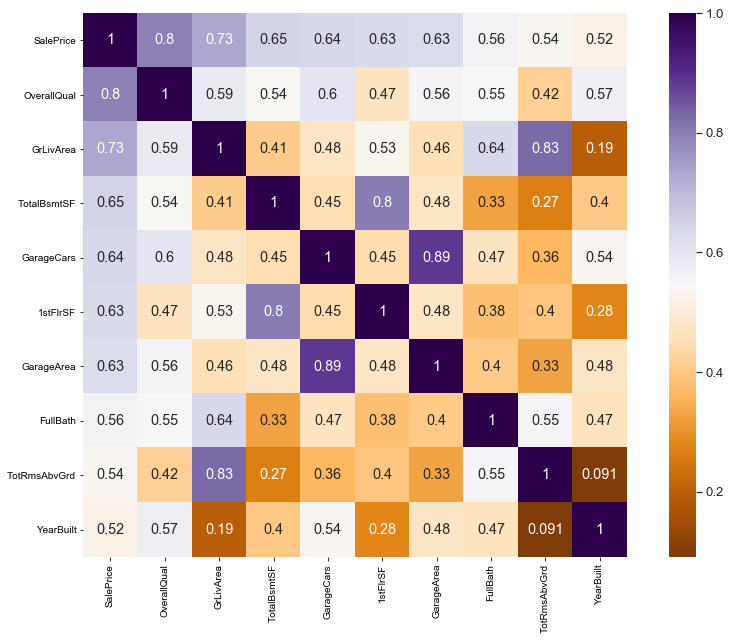

In [13]:
k =10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
f, ax= plt.subplots(figsize=(15,10))
sns.set(font_scale=1.20)
hm = sns.heatmap(cm, cmap="PuOr", annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)


Here I have taken the features which are correlated more than 50% with saleprice. From ieteration I have set k=10.

# FEATURE ENGINEERING

In [14]:
train_id = df_train['Id']
test_id = df_test['Id']
df_train.drop(columns = ['Id'], axis=1, inplace=True)
df_test.drop(columns = ['Id'], axis=1, inplace=True)

Id feature is not necessary for prediction, but it will be used later to create the submission file.

# MISSING DATA HANDLE 

In [15]:
total_missing = pd.DataFrame(df_train.isnull().sum()[df_train.isnull().sum()!=0].sort_values(ascending=False),
                             columns=['Total_Missing'])
total_missing['Percent'] = round(total_missing.Total_Missing/len(df_train)*100,2)
total_missing

,Total_Missing,Percent
PoolQC,1452,99.59
MiscFeature,1404,96.30
Alley,1367,93.76
Fence,1177,80.73
FireplaceQu,690,47.33
LotFrontage,259,17.76
GarageYrBlt,81,5.56
GarageType,81,5.56
GarageFinish,81,5.56
GarageQual,81,5.56


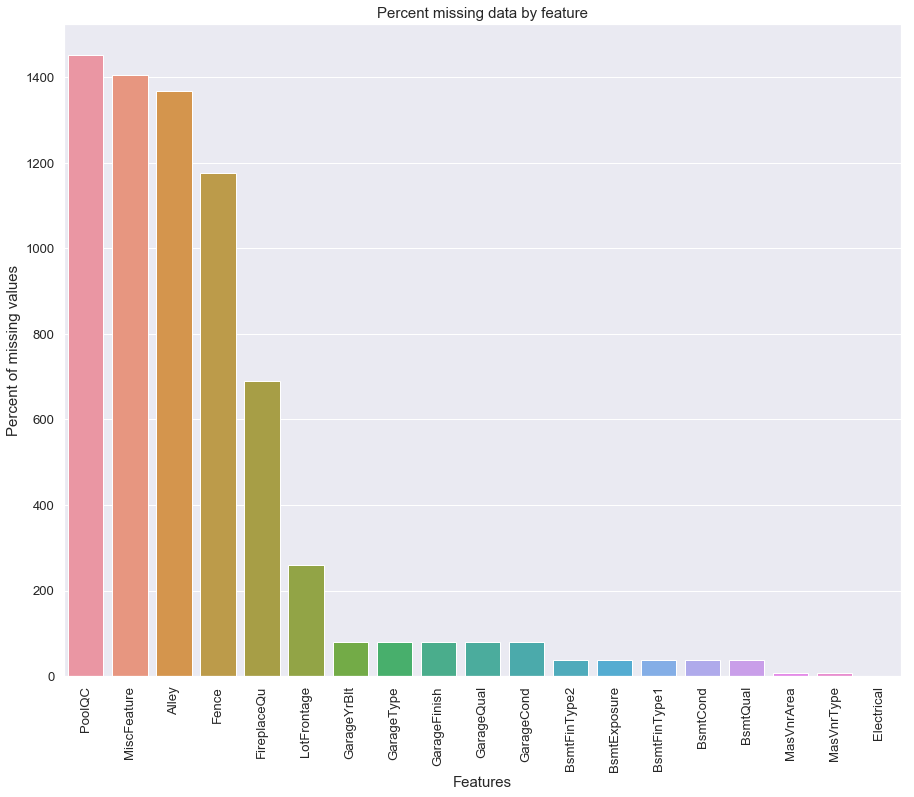

In [16]:
m_T = df_train.isnull().sum()[df_train.isnull().sum()!=0].sort_values(ascending=False)
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=m_T.index, y=m_T)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

# TRAIN DATA FILLING

In [17]:
missing_col1 = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageQual','GarageCond','GarageFinish',
                'GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2','MasVnrType']

for i in missing_col1:
    df_train[i] = df_train[i].fillna('None')
    

missing_col2 = ['GarageYrBlt','MasVnrArea']
for i in missing_col2:
    df_train[i] = df_train[i].fillna(0)
    

df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


missing_col3 = ['Electrical']
for i in missing_col3:
    df_train[i] = df_train[i].fillna(df_train[i].mode()[0])
    

total_missing = pd.DataFrame(df_train.isnull().sum()[df_train.isnull().sum()!=0].sort_values(ascending=False),
                             columns=['Total_Missing'])
total_missing['Percent'] = round(total_missing.Total_Missing/len(df_train)*100,2)
total_missing


,Total_Missing,Percent


In [18]:
total_missing = pd.DataFrame(df_test.isnull().sum()[df_test.isnull().sum()!=0].sort_values(ascending=False),
                             columns=['Total_Missing'])
total_missing['Percent'] = round(total_missing.Total_Missing/len(df_test)*100,2)
total_missing

,Total_Missing,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageYrBlt,78,5.35
GarageCond,78,5.35
GarageQual,78,5.35
GarageFinish,78,5.35


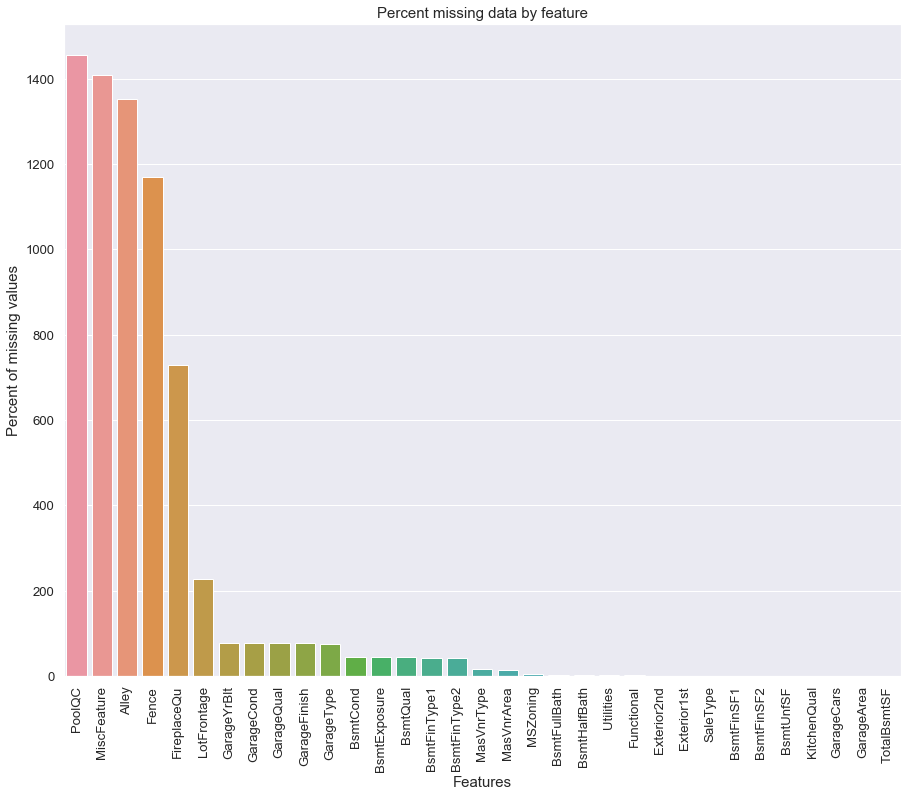

In [19]:
m = df_test.isnull().sum()[df_test.isnull().sum()!=0].sort_values(ascending=False)
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=m.index, y=m)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

# TEST DATA FILLING

In [20]:
missing_col1 = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageQual','GarageCond','GarageFinish',
                'GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2','MasVnrType']

for i in missing_col1:
    df_test[i] = df_test[i].fillna('None')
    

missing_col2 = ['GarageYrBlt','MasVnrArea','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath',
                'TotalBsmtSF','GarageCars','GarageArea']
for i in missing_col2:
    df_test[i] = df_test[i].fillna(0)
    

df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


missing_col3 = ['MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','SaleType']
for i in missing_col3:
    df_test[i] = df_test[i].fillna(df_test[i].mode()[0])
    
 
missing_col4 = ['Functional']
for i in missing_col4:
    df_test[i] = df_test[i].fillna('Typ')
    

total_missing = pd.DataFrame(df_test.isnull().sum()[df_test.isnull().sum()!=0].sort_values(ascending=False),
                             columns=['Total_Missing'])
total_missing['Percent'] = round(total_missing.Total_Missing/len(df_test)*100,2)
total_missing

,Total_Missing,Percent


Here PoolQC, MiscFeature, Alley columns are almost empty. Deleting these features is not a big problem though I have kept these because they also carray some weights and can affect some extent. Here all the missing values will be filled up.

1. Categorical features are filled with None.
2. Continuous features with relatively less missing values are replaced with zero.
3. LotFrontage feature is filled up by taking median from neighborhood.
4. Lastly the rest of the categorical features are filled up taking the mode.
5. For 'Functional' variable data description says NA means typical

# DATA CONVERSION AND FEATURE ENGINEERING

In [21]:
n_train=df_train.shape[0]
n_test=df_test.shape[0]
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.drop(['Utilities'], axis=1,)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,Normal,WD,0,Pave,8,856.0,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,Normal,WD,0,Pave,6,1262.0,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,Normal,WD,0,Pave,6,920.0,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,Abnorml,WD,0,Pave,7,756.0,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,Normal,WD,0,Pave,9,1145.0,192,2000,2000,2008
5,796,566,320,None,1,1Fam,TA,No,732.0,0.0,...,Normal,WD,0,Pave,5,796.0,40,1993,1995,2009
6,1694,0,0,None,3,1Fam,TA,Av,1369.0,0.0,...,Normal,WD,0,Pave,7,1686.0,255,2004,2005,2007
7,1107,983,0,None,3,1Fam,TA,Mn,859.0,32.0,...,Normal,WD,0,Pave,7,1107.0,235,1973,1973,2009
8,1022,752,0,None,2,1Fam,TA,No,0.0,0.0,...,Abnorml,WD,0,Pave,8,952.0,90,1931,1950,2008
9,1077,0,0,None,2,2fmCon,TA,No,851.0,0.0,...,Normal,WD,0,Pave,5,991.0,0,1939,1950,2008


Data cleaning, missing data hadling,data conversion is necessary for both training data and test data.

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

Here all_data contains all the columns and rows of train and test csv except the 'Id', 'Utilities' and 'SalePrice'.

In [22]:
saleprice = df_train['SalePrice']
saleprice = saleprice.to_frame().as_matrix()

Target feature SalePrice is converted to matrix to flatten the DataFrame for feeding it to placeholder.

In [23]:
all_data['OverallCond'] = all_data['OverallCond'].astype(str) 
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

These features are actually categorical but assigned numeric values. 


# LABEL ENCODING OF CATEGORICAL FEATURES

In [24]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish',
        'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir',
        'MSSubClass', 'OverallCond', 'YrSold', 'MoSold','MSZoning','LandContour',
        'LotConfig','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
        'Heating','Electrical','GarageType','MiscFeature','SaleType','SaleCondition'
       )

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
       
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 79)


Label Encoder is used so that the categorical variables that are carrying information in their order can be used. It has enhanced the parformance of the system.

In [25]:
all_data['TotalSF'] = all_data['TotalBsmtSF']+all_data['1stFlrSF']+all_data['2ndFlrSF']

'TotalBsmtSF' and '1stFlrSF' are correlated 80 percent but not correlated with '2ndFlrSF'. That's why a new feature is introduced combining these three which will give positive information gain.

# SKEWNESS AND KURTOSIS OF THE FEATURES

In [26]:
n_feats = all_data.dtypes[all_data.dtypes != 'object'].index
s_feats = all_data[n_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
k_feats = all_data[n_feats].apply(lambda x: kurtosis(x.dropna()))
skew_kurt = pd.DataFrame({'Skewness': s_feats, 'Kurtosis':k_feats})
skewed = pd.DataFrame(s_feats)
print("Number of skewed & kurt features to Box CoX transformation:",skew_kurt.shape[0])
skew_kurt

Number of skewed & kurt features to Box CoX transformation: 79


,Skewness,Kurtosis
1stFlrSF,1.257286,5.064541
2ndFlrSF,0.861556,-0.425514
3SsnPorch,11.372080,149.046731
Alley,-0.651705,11.660051
BedroomAbvGr,0.326568,1.932990
BldgType,2.191095,3.185635
BsmtCond,-2.861271,6.725998
BsmtExposure,-1.117321,-0.230705
BsmtFinSF1,0.980645,1.422633
BsmtFinSF2,4.144503,18.794367


Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.

Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

The rule of thumb seems to be:
1. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
2. If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
3. If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

High kurtosis in a data set is an indicator that data has heavy tails or outliers. 

Low kurtosis in a data set is an indicator that data has light tails or lack of outliers. 


In [27]:
sk_feature = skew_kurt.index
lam =0.50
for i in sk_feature:
    if skewed[0][i]>0.60 or skewed[0][i]<-0.60:
        all_data[i] = boxcox1p(all_data[i],lam)


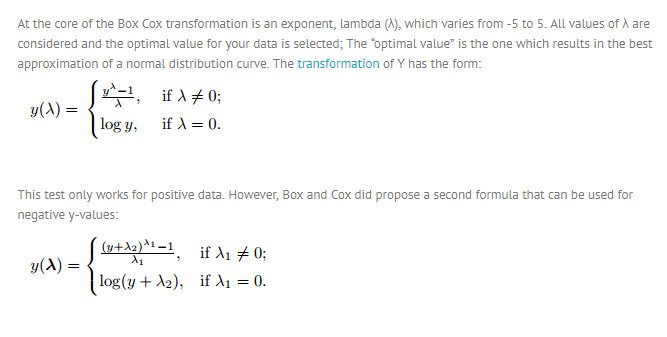

In [28]:
from IPython.display import Image
Image('boxcox1.PNG')

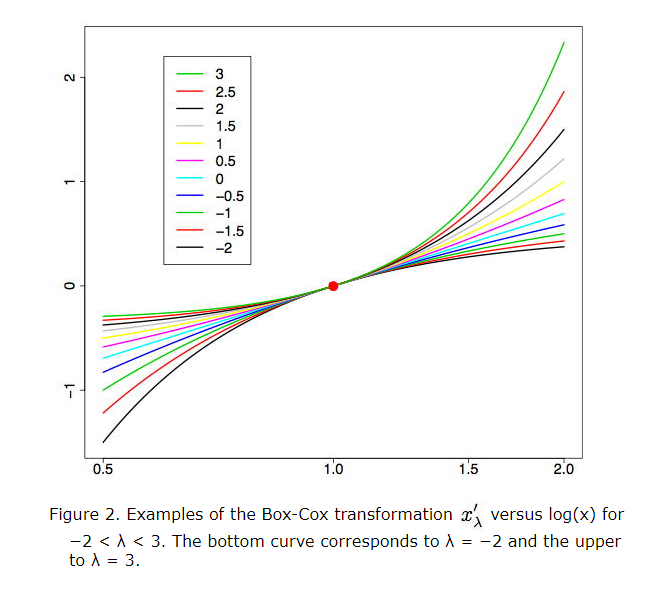

In [29]:
from IPython.display import Image
Image('boxcox2.PNG')

From the second figure it is seen that in lambda=0.5 the data is show normalization. From trial and error lambda=0.5 gave the best accuracy.

Reference Link:
1. http://onlinestatbook.com/mobile/transformations/box-cox.html
2. https://www.statisticshowto.datasciencecentral.com/box-cox-transformation/

# TRAIN TEST SPLIT

In [30]:
all_data = pd.get_dummies(all_data, drop_first=True)
train_split = all_data[:n_train]
test_split = all_data[n_train:]

get_dummies function is used to One Hot Encoding the categorical features.

In [31]:
train_x, test_x, train_Y, test_Y = train_test_split(train_split, saleprice, test_size=0.30, random_state=20)
print('Train_X:',train_x.shape)
print('Train_Y:',train_Y.shape)
print('Test_X:',test_x.shape)
print('Test_Y:',test_Y.shape)

Train_X: (1020, 80)
Train_Y: (1020, 1)
Test_X: (438, 80)
Test_Y: (438, 1)


For cross validation 70 percent is used as traing set and rest for test purpose. If the train and test accuracy is good enough and relatively near then the data set is properly regularized and ready for predicton for actual test set.

# PREPROCESSING

In [32]:
scaler = prep.MinMaxScaler()
train_X = train_x.as_matrix().astype(float)
test_X=test_x.as_matrix().astype(float)
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
train=train_split.as_matrix().astype(float)
test=test_split.as_matrix().astype(float)
train= scaler.fit_transform(train)
test = scaler.transform(test)

MinMaxScaler: Transforms features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set. e.g. between zero and one.

fit_transform(X[,y]): Fit to data, then transform it.

transform(X): Scaling features of X according to feature range.

.as_matrix().astype(float): Converts the DataFrame to matrix of floating values. Matrix conversion is necessary for feeding in the placeholder.

Here scaling is done because otherwise the weights will be biased. Some particular variables will dominate the others and the weights will be updated as per the dominating feature variables. It will hinder the model to predict accurately and RMSE error will be higher.

# DNN MODEL ON TENSORFLOW

# MULTI-LAYER PERCEPTRON

An MLP is composed of one (passthrough) input layer, one or more layers of LTUs, called hidden layers, and one final layer of LTUs called the output layer. Every layer except the output payer includes a bias neuron and is fully connected to the next layer. When an ANN has two or more hidden layers, it is called a deep neural network(DNN).

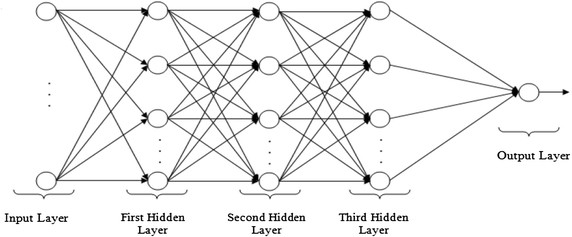

In [33]:
from IPython.display import Image
Image('mlp.png')

# MINI-BATCH GRADIENT DESCENT

In [34]:
def minibatch(num, data, labels):
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

# Feeding Data to the Training Algorithm

To implement Mini-batch Gradient Descent here I have created a function called 'minibatch' to replace train set and test set at every iteration with the next mini-batch. The simplest way to do this is to use placeholder nodes. These nodes are special because they don't actually perform any computation, they are used to pass the training data to TensorFlow during training. The shape of the placeholder is None means it can feed data of any size. Here minibatch function first create a variable idx of range (o to len(train data)) then suffle the numbers. Then the suffled data is taken to the size of batch size. Afterthat it suffles the values and respective labels and return as numpy array.

# TENSORFLOW MODEL

Here weights variable will hold the weights matrix. It will be a 2D tensor containing all the connection weights between each input and each neuron, hence its shape will be (n_inputs, n_neurons). It will be initialized randomly, using a truncated normal (Gaussian) distribution.

Next variable biases create one bias parameter per neuron.

Then the subgraph created to compute z=X.W+b. This vectorized implementation will efficiently compute the weighted sums of the inputs plus the bias term for each and every neuron in the layer, for all the instances in the batch in just one shot. Finally the activation parameter is set to 'relu' which return relu(z).

In [35]:

def tf_model(train_set, test_set, target, actuals=None,validation=False):
   
    learning_rate = 0.0015
    training_epochs = 11000
    display_step = 500
    batch_size = 900
    num_inputs = train_set.shape[1]
    
   
    n_hidden_1 = 300
    n_hidden_2 = 19
    num_output = 1 
    
    
    X = tf.placeholder(tf.float32, shape=(None, num_inputs))
    Y = tf.placeholder(tf.float32, shape=(None, 1))
    n_samples = train_set.shape[0]
    

    weights = {
        'h1': tf.Variable(tf.random_normal([num_inputs, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, num_output]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_output]))
    }
    
    
    def DNN(x):
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        layer_2 = tf.nn.relu(layer_2)
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer

    
    logits = DNN(X)
    pred = tf.nn.relu(logits)
    
    loss_op = tf.nn.l2_loss(pred - Y)
    rmse = tf.sqrt(tf.reduce_sum(tf.pow(tf.log1p(pred)-tf.log1p(Y), 2))/(2*n_samples))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(rmse)

    
    init = tf.global_variables_initializer()

    
    with tf.Session() as sess:
        
        sess.run(init)

        for step in range(1, training_epochs+1):
            batch_x, batch_y = minibatch(batch_size, train_set, target)
            
            sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y})
            if step % display_step == 0 or step == 1:
                print("Step " + str(step) + ", Minibatch RMSE= " + \
                      "{:.5f}".format(sess.run(rmse, feed_dict={X: batch_x, Y: batch_y}))
                      + ", Minibatch Loss = " + \
                      "{:.5f}".format(sess.run(loss_op, feed_dict={X: batch_x, Y: batch_y})))

        print("Optimization Finished!")

        training_cost = sess.run(rmse, feed_dict={X: train_set, Y: target})  
        predictions = sess.run(pred, feed_dict={X: test_set})
        print("Training Error = ", sess.run(rmse, feed_dict={X: train_set, Y: target}))
        
        if validation==True: 
            print("Validation error = ", sess.run(rmse, feed_dict={X: test_set, Y: actuals}))
        
        return predictions

ADAM OPTIMIZATION: Adam stands for adaptive moment estimation, combines the ideas of mMomentum optimization and RMSProp: just  like Momentum optimization it keeps track of an exponentially decaying average of past gradients, and just like RMSProp it keeps track of an exponentially decaying average of past squared gradients.

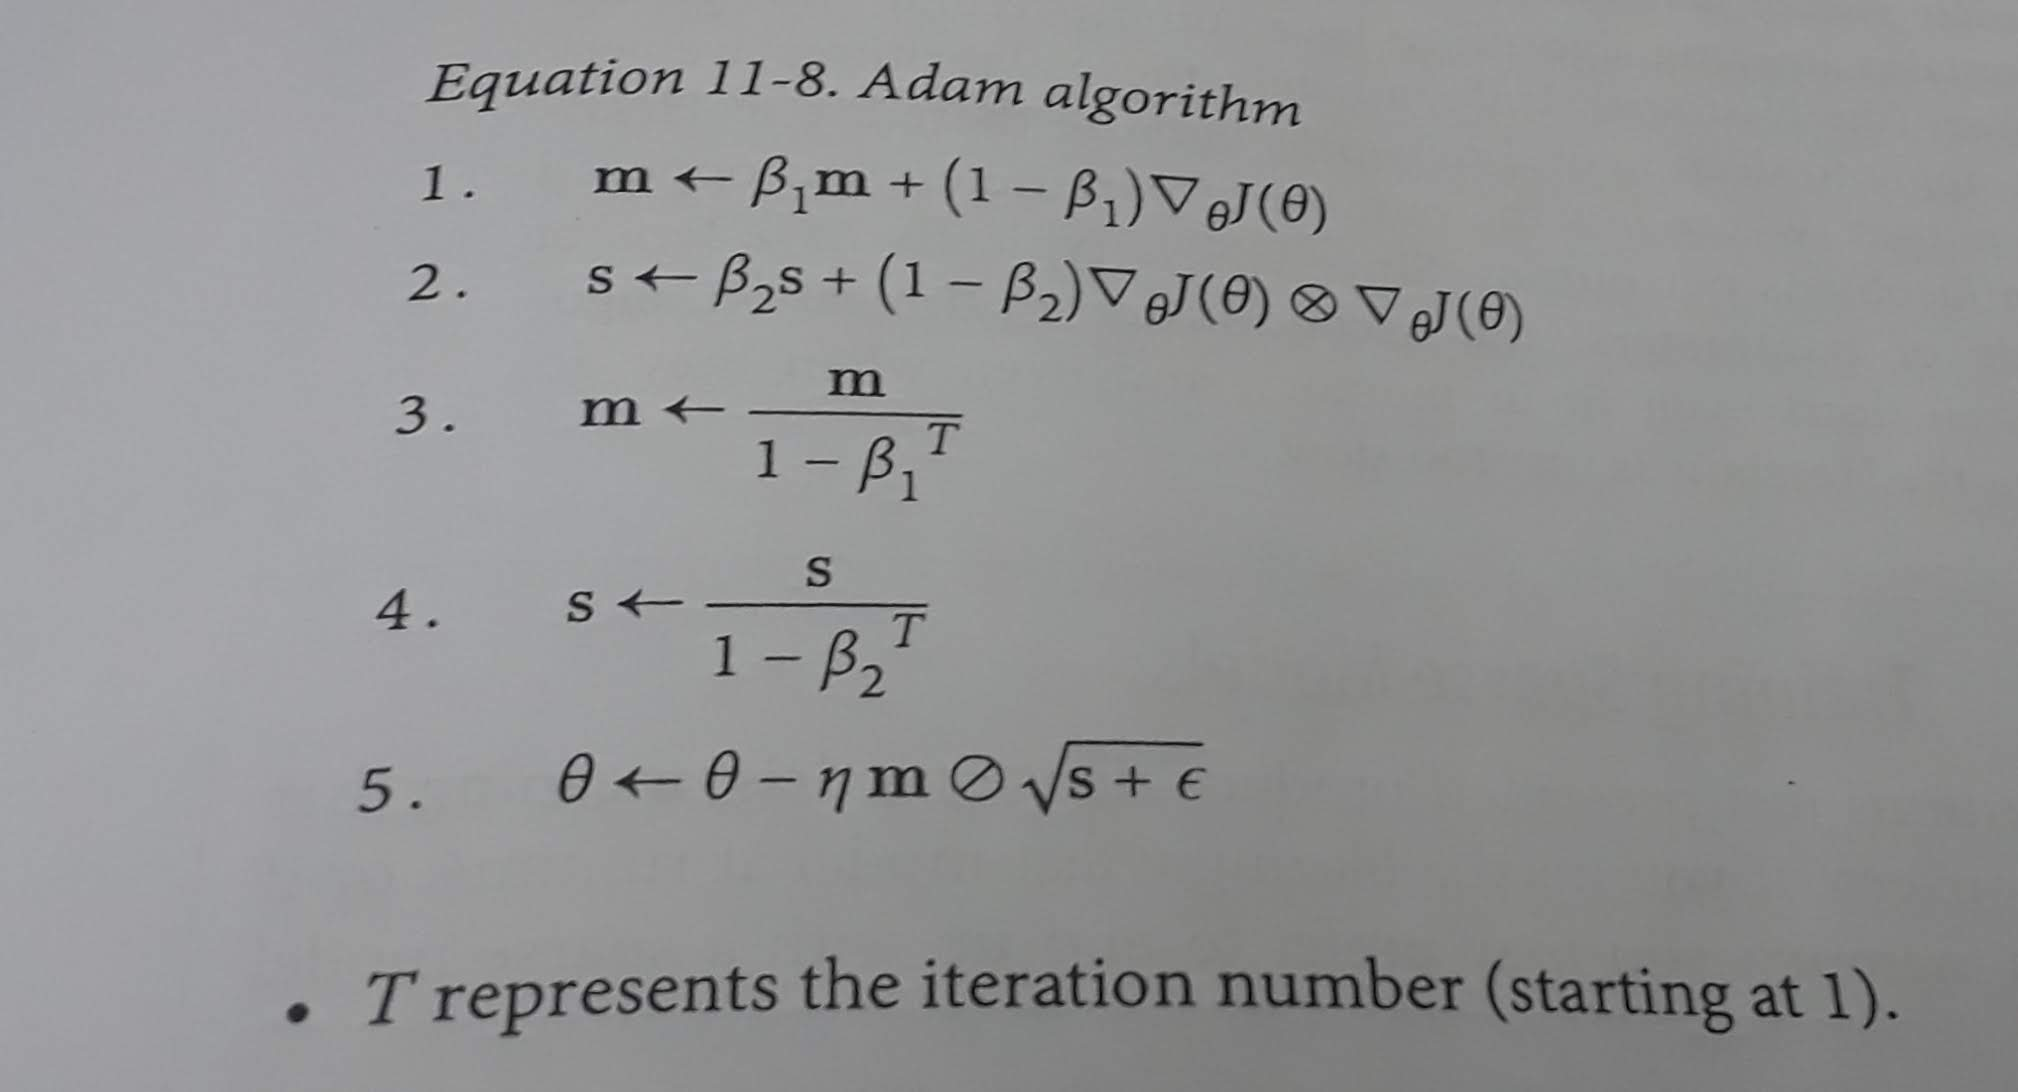

In [36]:
from IPython.display import Image
Image('adam.jpg')

Adam is an adaptive learning rate algorithm (like AdaGrad and RMSProp), it requires less tuning of the learning rate hyperparameter. Useing the default value learning_rate=0.001, making Adam even easier to use than Gradient Descent. Though here learning rate is used 0.0015. This value is optimized through iteration.

L2 Regularization: Deep neural networks typically have tens of thousands of parameters, sometimes even millions. With so many parameters, the network has an incredible amount of freedom and can fit a huge variety of complex datasets. But this flexibility also means that it prone to overfit the training set. L2 regularization constrains a neural network's connection weights (but typically not its biases). Here I have created a variable loss_op and passed a function which takes weights as an argument and returns the corresponding regularization loss.

# HYPER PARAMETER TUNING
Hyper parameter tuning played a vital role to minimize to RMSE. Here training_epochs, batch_size, learning rate, number of hidden layers and number of neurons per hidden layer are set through hundreds of trial and error in which the model performs the best. Grid search is not used because it is  computationally costly. 

# CROSS VALIDATION & OPTIMIZATION ON TRAINING SET

In [37]:
predictions = tf_model(train_X, test_X, train_Y, test_Y, validation=True)

Step 1, Minibatch RMSE= 4.58716, Minibatch Loss = 17087128928256.00000
Step 500, Minibatch RMSE= 1.00493, Minibatch Loss = 11503803564032.00000
Step 1000, Minibatch RMSE= 0.28596, Minibatch Loss = 3418892009472.00000
Step 1500, Minibatch RMSE= 0.23010, Minibatch Loss = 2223591653376.00000
Step 2000, Minibatch RMSE= 0.21343, Minibatch Loss = 1923130064896.00000
Step 2500, Minibatch RMSE= 0.19238, Minibatch Loss = 1758986502144.00000
Step 3000, Minibatch RMSE= 0.15230, Minibatch Loss = 1188023631872.00000
Step 3500, Minibatch RMSE= 0.11816, Minibatch Loss = 823973183488.00000
Step 4000, Minibatch RMSE= 0.10306, Minibatch Loss = 582553567232.00000
Step 4500, Minibatch RMSE= 0.09505, Minibatch Loss = 489540222976.00000
Step 5000, Minibatch RMSE= 0.09071, Minibatch Loss = 418807840768.00000
Step 5500, Minibatch RMSE= 0.08282, Minibatch Loss = 373348401152.00000
Step 6000, Minibatch RMSE= 0.08040, Minibatch Loss = 334460846080.00000
Step 6500, Minibatch RMSE= 0.07853, Minibatch Loss = 304983

As the training error and validation error is close enough so the model is regularized properly.

# PREDICTION FOR DNN ON TEST SET

In [38]:
predictions = tf_model(train, test, saleprice)

sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = predictions
sub.to_csv('submission_DNN.csv',index=False)

Step 1, Minibatch RMSE= 3.96322, Minibatch Loss = 17543202865152.00000
Step 500, Minibatch RMSE= 0.85498, Minibatch Loss = 12068918919168.00000
Step 1000, Minibatch RMSE= 0.23252, Minibatch Loss = 3290219151360.00000
Step 1500, Minibatch RMSE= 0.18990, Minibatch Loss = 2279740014592.00000
Step 2000, Minibatch RMSE= 0.18371, Minibatch Loss = 2132032880640.00000
Step 2500, Minibatch RMSE= 0.16147, Minibatch Loss = 1973317140480.00000
Step 3000, Minibatch RMSE= 0.11643, Minibatch Loss = 1090278588416.00000
Step 3500, Minibatch RMSE= 0.09192, Minibatch Loss = 561845239808.00000
Step 4000, Minibatch RMSE= 0.09066, Minibatch Loss = 705675526144.00000
Step 4500, Minibatch RMSE= 0.07825, Minibatch Loss = 466895142912.00000
Step 5000, Minibatch RMSE= 0.07563, Minibatch Loss = 495105376256.00000
Step 5500, Minibatch RMSE= 0.06901, Minibatch Loss = 310558064640.00000
Step 6000, Minibatch RMSE= 0.07006, Minibatch Loss = 397622280192.00000
Step 6500, Minibatch RMSE= 0.06439, Minibatch Loss = 321150

# KAGGLE SCORE


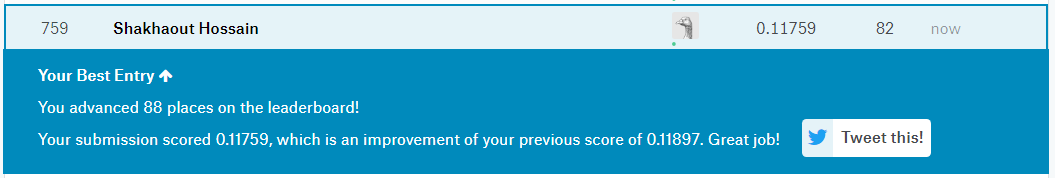

In [39]:
from IPython.display import Image
Image('NN.PNG')

# DISCUSSION
 The kaggle score screenshot above is for Deep Neural Network model on TensorFLow. Here no boosting or ensemble is used in this method. Preprocessing and better understanding of the model and hyper parameter tuning helped to achieve this score.

# REFERENCES

1. Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron
2. Stacked Regressions : Top 4% on LeaderBoard by Serigne. Link: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
3. Comprehensive data exploration with Python by Pedro Marcelino. Link: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
4. Regression in Neural Networks using TensorFlow(Low Level APIs) by Shantanu Singh. Link: https://medium.com/@shantanusingh_71633/regression-in-neural-networks-using-tensorflow-low-level-apis-818b8bb7b433